**Заголовок:** Разработка модели для интернет-магазина «В один клик»

**Описание проекта:**
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.


**Цель исследования:** 

1. Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. Включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Выделить сегменты покупателей и разработать для них персонализированные предложения, используя данные модели и данные о прибыльности клиентов.

**Ход исследования:**

- Загрузка и изучение общей информации из предоставленных датасетов.
- Предобработка данных: проверка данных на наличие пропусков и дубликатов. Проверка корректности типов данных у каждого признака. 
- Исследовательский анализ данных: проведение исследовательского анализа данных. Отбор клиентов с покупательской активностью не менее трёх месяцев.
- Проведение корреляционного анализа признаков в датасете.
- Подготовка пайплайнов: обработка в пайплайне количественных и категориальных признаков; обучение моделей логистической регрессии, k ближайших соседей, дерева решений и опорных векторов; выбор лучшей модели. 
- Анализ важности признаков: оценка важности признаков для лучшей модели и построение графика важности с помощью метода SHAP. 
- Сегментация покупателей: сегментация покупателей с помощью результатов моделирования и данных о прибыльности покупателей; поиск способа увеличения покупательской активности. 


**Общий вывод:** обобщение выводов о проделанной работе в ходе исследования.

<a id='one_id'></a>
## Загрузка данных

Загрузим все необходимы для работы библиотеки, классы, функции.

In [1]:
# Установим библиотеки:

# phik для расчета корреляции
!pip install phik -q

# shap для для анализа SHAP-значений
!pip install shap -q

# Установим актуальную версию версию matplotlib 
!pip install -U matplotlib -q

# Установим актуальную версию библиотеки sklearn
!pip install -U scikit-learn -q

In [2]:
# Импортируем библиотеку pandas для работы с датафреймом
import pandas as pd

# Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import matplotlib.pyplot as plt

# Импортируем библиотеку seaborn для построения графиков
import seaborn as sns

# Импортируем библиотеку numpy  для математических операций 
import numpy as np

# Импортируем функцию train_test_split для разделения данных
# Импортируем функцию cross_val_predict для кросс-валидации
from sklearn.model_selection import train_test_split, cross_val_predict

# Импортируем библиотеку phik для расчета корреляции
import phik

# Импортируем класс pipeline для работы с пайплайнами
from sklearn.pipeline import Pipeline

# Импортируем класс ColumnTransformer для работы с данными разного типа в одном наборе
from sklearn.compose import ColumnTransformer

# Импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV

# Импортируем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# Импортируем: 
# класс StandardScaler для стандартизации данных
# класс MinMaxScaler для нормализации данных
# класс OneHotEncoder для кодирования данных
# класс OrdinalEncoder для кодирования порядковых данных
# класс LabelEncoder для кодирования целевого признака
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

# Импортируем:
# класс LogisticRegression для логистической регрессии
# класс KNeighborsClassifier для k ближайших соседей
# класс DecisionTreeClassifier для дерева решений
# класс SVC для опорных векторов
# класс DummyClassifier константная модель
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# Импортируем функцию shap для анализа SHAP-значений
import shap

# Импортируем метрики
from sklearn.metrics import roc_auc_score, recall_score, precision_score, confusion_matrix, roc_curve 

import warnings
warnings.filterwarnings('ignore')

Загрузим данные в датафреймы <code>pandas</code>. 

In [3]:
# Поместим датасет market_file.csv в переменную df_file
df_file = pd.read_csv('/Users/eduardgorbacev/Documents/GitHub/ML_customers_purchasing_activity_for_an_online_store/data_files/market_file.csv')

# Поместим датасет market_money.csv в переменную df_money
df_money = pd.read_csv('/Users/eduardgorbacev/Documents/GitHub/ML_customers_purchasing_activity_for_an_online_store/data_files/market_money.csv')

# Поместим датасет market_time.csv в переменную df_time
df_time = pd.read_csv('/Users/eduardgorbacev/Documents/GitHub/ML_customers_purchasing_activity_for_an_online_store/data_files/market_time.csv')

# Поместим датасет money.csv в переменную df_tm_money
df_tm_money = pd.read_csv('/Users/eduardgorbacev/Documents/GitHub/ML_customers_purchasing_activity_for_an_online_store/data_files/money.csv', sep= ';', decimal =',')

In [4]:
# Напишем собственную функцию, которая будет выводить информацию о датасете и случайные 5 строк
def info_data(data):
    try:
        info_result = data.info()
        sample_result = data.sample(5)
        return info_result, display(sample_result)
    except:
        print: 'Информация недоступна, проверьте датасет'

### Рассмотрим датасет <code>df_file</code>

In [5]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(df_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1135,216483,Прежний уровень,стандарт,нет,4.9,4,816,0.95,Мелкая бытовая техника и электроника,6,1,5,13
714,216062,Прежний уровень,стандарт,нет,3.9,4,311,0.26,Кухонная посуда,3,1,4,10
344,215692,Снизилась,стандарт,да,3.3,3,871,0.20,Техника для красоты и здоровья,2,4,2,17
201,215549,Снизилась,премиум,да,2.6,3,683,0.28,Товары для детей,1,5,3,6
1016,216364,Прежний уровень,стандарт,нет,3.6,4,514,0.95,Товары для детей,4,4,5,13


(None, None)

Датасет <code>df_file</code> содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:

- <code>id</code> — номер покупателя в корпоративной базе данных.
- <code>Покупательская активность</code> — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- <code>Тип сервиса</code> — уровень сервиса, например «премиум» и «стандарт».
- <code>Разрешить сообщать</code> — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- <code>Маркет_актив_6_мес</code> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- <code>Маркет_актив_тек_мес</code> — количество маркетинговых коммуникаций в текущем месяце.
- <code>Длительность</code> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- <code>Акционные_покупки</code> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- <code>Популярная_категория</code> — самая популярная категория товаров у покупателя за последние 6 месяцев.
- <code>Средний_просмотр_категорий_за_визит</code> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- <code>Неоплаченные_продукты_штук_квартал</code> — общее число неоплаченных товаров в корзине за последние 3 месяца.
- <code>Ошибка_сервиса</code> — число сбоев, которые коснулись покупателя во время посещения сайта.
- <code>Страниц_за_визит</code> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Данные в таблице соответствуют описанию. Наименования столбцов не соответствуют стандартам оформления данных, их следует привести к нижнему и змеиному регистру. Столбцы <code>Покупательская активность</code>, <code>Тип сервиса</code>, <code>Разрешить сообщать</code>, <code>Популярная_категория</code> следует преобразовать в тип <code>category</code>, так как они содержат категориальные типы данных, а преобразование ускорит последующую работу с данными. 

In [6]:
# Переименуем столбцы 
df_file = df_file.rename(columns = {
    'Покупательская активность': 'покупательская_активность',
    'Тип сервиса': 'тип_сервиса',
    'Разрешить сообщать': 'разрешить_сообщать',
    'Маркет_актив_6_мес': 'маркет_актив_шесть_мес',
    'Маркет_актив_тек_мес': 'маркет_актив_тек_мес',
    'Длительность': 'длительность',
    'Акционные_покупки': 'акционные_покупки',
    'Популярная_категория': 'популярная_категория',
    'Средний_просмотр_категорий_за_визит': 'средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал': 'неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса': 'ошибка_сервиса',
    'Страниц_за_визит': 'страниц_за_визит'
})

df_file.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_шесть_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Преобразуем столбцы <code>покупательская_активность</code>, <code>тип_сервиса</code>, <code>разрешить_сообщать</code>, <code>популярная_категория</code> в тип <code>category</code>.

In [7]:
# С помощью метода astype преобразуем данные
columns_for_replace = ['покупательская_активность', 'тип_сервиса', 
                       'разрешить_сообщать', 'популярная_категория']

for column in columns_for_replace:
    df_file[column] = df_file[column].astype('category')
    
info_data(df_file)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int64   
 1   покупательская_активность            1300 non-null   category
 2   тип_сервиса                          1300 non-null   category
 3   разрешить_сообщать                   1300 non-null   category
 4   маркет_актив_шесть_мес               1300 non-null   float64 
 5   маркет_актив_тек_мес                 1300 non-null   int64   
 6   длительность                         1300 non-null   int64   
 7   акционные_покупки                    1300 non-null   float64 
 8   популярная_категория                 1300 non-null   category
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64   
 11  ошибка_сервиса   

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_шесть_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
1192,216540,Прежний уровень,стандарт,нет,4.6,5,347,0.25,Мелкая бытовая техника и электроника,4,4,5,12
526,215874,Прежний уровень,стандарт,да,4.1,5,626,0.15,Техника для красоты и здоровья,4,2,4,16
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
787,216135,Прежний уровень,стандарт,нет,5.6,3,563,0.21,Домашний текстиль,4,1,2,13
1035,216383,Прежний уровень,стандарт,да,4.3,5,748,0.95,Косметика и аксесуары,3,1,6,6


(None, None)

### Рассмотрим датасет <code>df_money</code>

In [8]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(df_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
2205,216083,текущий_месяц,7182.2
2613,216219,текущий_месяц,4968.4
3014,216352,предыдущий_месяц,5032.0
1568,215870,текущий_месяц,4085.0
3098,216380,препредыдущий_месяц,4400.0


(None, None)

Датасет <code>df_money</code> содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом:

- <code>id</code> — номер покупателя в корпоративной базе данных.
- <code>Период</code> — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- <code>Выручка</code> — сумма выручки за период.

Данные в таблице соответствуют описанию. Наименования столбцов следует привести к нижнему регистру. Столбец <code>Период</code> переобразовать в тип <code>category</code>.

In [9]:
# Переименуем столбцы 
df_money = df_money.rename(columns = {
    'Период': 'период',
    'Выручка': 'выручка',
}
                          )

df_money.columns

Index(['id', 'период', 'выручка'], dtype='object')

In [10]:
# С помощью метода astype преобразуем данные
df_money['период'] = df_money['период'].astype('category')

info_data(df_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       3900 non-null   int64   
 1   период   3900 non-null   category
 2   выручка  3900 non-null   float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 65.0 KB


,id,период,выручка
915,215653,текущий_месяц,5854.2
3487,216510,предыдущий_месяц,5821.0
776,215606,препредыдущий_месяц,4583.0
2873,216305,текущий_месяц,6567.4
3668,216570,текущий_месяц,5235.3


(None, None)

### Рассмотрим датасет <code>df_time</code>

In [11]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(df_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
2251,216473,текущий_месяц,18
416,215556,текущий_месяц,8
2468,216582,текущий_месяц,20
1805,216250,предыдцщий_месяц,19
2222,216459,предыдцщий_месяц,16


(None, None)

Датасет <code>df_time</code> содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:

- <code>id</code> — номер покупателя в корпоративной базе данных.
- <code>Период</code> — название периода, во время которого зафиксировано общее время.
- <code>минут</code> — значение времени, проведённого на сайте, в минутах.

Данные в таблице соответствуют описанию. Наименования столбца <code>Период</code> следует привести к нижнему регистру и преобразовать в тип <code>category</code>.

In [12]:
# Переименуем столбец 
df_time = df_time.rename(columns = {'Период': 'период'})

# С помощью метода astype преобразуем данные
df_time['период'] = df_time['период'].astype('category')

info_data(df_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      2600 non-null   int64   
 1   период  2600 non-null   category
 2   минут   2600 non-null   int64   
dtypes: category(1), int64(2)
memory usage: 43.4 KB


,id,период,минут
1359,216027,текущий_месяц,21
2077,216386,предыдцщий_месяц,16
897,215796,предыдцщий_месяц,16
2135,216415,предыдцщий_месяц,12
2376,216536,текущий_месяц,13


(None, None)

### Рассмотрим датасет <code>df_tm_money</code>

In [13]:
# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(df_tm_money)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,Прибыль
68,215416,4.22
69,215417,4.50
108,215456,5.83
1091,216439,4.32
284,215632,3.91


(None, None)

Датасет <code>df_tm_money</code> содержит данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж по каждому покупателю:

- <code>id</code> — номер покупателя в корпоративной базе данных.
- <code>Прибыль</code> — значение прибыли.

Данные в таблице соответствуют описанию. Наименования столбца <code>Прибыль</code> следует привести к нижнему регистру.

In [14]:
# Переименуем столбец 
df_tm_money = df_tm_money.rename(columns = {'Прибыль': 'прибыль'})

df_tm_money.columns

Index(['id', 'прибыль'], dtype='object')

### Промежуточный вывод:

Мы изучили данные в датасетах <code>df_file</code>, <code>df_time</code>, <code>df_money</code> <code>df_file</code>, <code>df_tm_money</code>. 

- Привели наименования столбцов к нижнему змеиному регистру.
- Преобразовали категориальные столбцы в тип тип <code>category</code> для упрощения и ускорения дальнейшей работы. Данные такого типа занимают меньше памяти. 
- В датасете <code>df_file</code> выявили **целевой признак** - столбец <code>покупательская_активность</code>, который содержит два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень». Значит нам предстоит решать задачу бинарной классификации. 

<a id='two_id'></a>
## Предобработка данных

In [15]:
# Напишем собственную функцию, которая будет выводить информацию 
# о пропусках, описательную статистику, явные дубликаты
def describe_data(data):
    try:
        missed_result = pd.DataFrame(round(data.isna().mean()*100, 1)).style.background_gradient('coolwarm')
        describe_result = round(data.describe().T, 2)
        duplicated_result = data[data.duplicated()]
        return display(missed_result, describe_result, duplicated_result)
    except:
        print: 'Информация недоступна, проверьте датасет'

### Проведем предобработку данных датасета <code>df_file</code>

In [16]:
# Выведем информацию о пропусках, описательную статистику, явные дубликаты
describe_data(df_file)

,0
id,0.000000
покупательская_активность,0.000000
тип_сервиса,0.000000
разрешить_сообщать,0.000000
маркет_актив_шесть_мес,0.000000
маркет_актив_тек_мес,0.000000
длительность,0.000000
акционные_покупки,0.000000
популярная_категория,0.000000
средний_просмотр_категорий_за_визит,0.000000


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.50,375.42,215348.0,215672.75,215997.50,216322.25,216647.00
маркет_актив_шесть_мес,1300.0,4.25,1.01,0.9,3.70,4.20,4.90,6.60
маркет_актив_тек_мес,1300.0,4.01,0.70,3.0,4.00,4.00,4.00,5.00
длительность,1300.0,601.90,249.86,110.0,405.50,606.00,806.00,1079.00
акционные_покупки,1300.0,0.32,0.25,0.0,0.17,0.24,0.30,0.99
средний_просмотр_категорий_за_визит,1300.0,3.27,1.36,1.0,2.00,3.00,4.00,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.84,1.97,0.0,1.00,3.00,4.00,10.00
ошибка_сервиса,1300.0,4.19,1.96,0.0,3.00,4.00,6.00,9.00
страниц_за_визит,1300.0,8.18,3.98,1.0,5.00,8.00,11.00,20.00


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_шесть_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит


In [17]:
# Проверим датасет на наличие неявных дубликатов по столбцу id
df_file[df_file['id'].duplicated()]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_шесть_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит


В датасете <code>df_file</code> отсутствуют пропуски, явные и неявные дубликаты. Среди количественных признаков аномальных значений и выбросов не обнаружено. Проверим уникальные значения категориальных столбцов <code>покупательская_активность</code>, <code>тип_сервиса</code>, <code>разрешить_сообщать</code>, <code>популярная_категория</code>.

In [18]:
# Выведем уникальные значения категориальных столбцов
for column in columns_for_replace:
    print(f'Уникальные значения столбца {column}: \n {df_file[column].unique()}')

Уникальные значения столбца покупательская_активность: 
 ['Снизилась', 'Прежний уровень']
Categories (2, object): ['Прежний уровень', 'Снизилась']
Уникальные значения столбца тип_сервиса: 
 ['премиум', 'стандартт', 'стандарт']
Categories (3, object): ['премиум', 'стандарт', 'стандартт']
Уникальные значения столбца разрешить_сообщать: 
 ['да', 'нет']
Categories (2, object): ['да', 'нет']
Уникальные значения столбца популярная_категория: 
 ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Кухонная посуда', 'Мелкая бытовая техника и электроника']
Categories (6, object): ['Домашний текстиль', 'Косметика и аксесуары', 'Кухонная посуда', 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья', 'Товары для детей']


В столбце <code>тип_сервиса</code> присутствует категориальное значение с ошибкой, слово 'стандартт' написано с двумя буквами «т» из-за чего у нас образовалось 3 категории вместо двух. Заменим значение 'стандартт' на 'стандарт'.

В столбце <code>популярная_категория</code> в слове аксесуары пропущена буква «с». Заменим 'Косметика и аксесуары' на 'Косметика и аксессуары'

In [19]:
# Проведем замену значения в столбце "тип_сервиса"
df_file[['тип_сервиса', 'популярная_категория']] = (
    df_file[['тип_сервиса', 'популярная_категория']]
    .replace('стандартт', 'стандарт')
    .replace('Косметика и аксесуары', 'Косметика и аксессуары')
)

print(df_file['тип_сервиса'].unique())
df_file['популярная_категория'].unique()

['премиум', 'стандарт']
Categories (2, object): ['премиум', 'стандарт']


['Товары для детей', 'Домашний текстиль', 'Косметика и аксессуары', 'Техника для красоты и здоровья', 'Кухонная посуда', 'Мелкая бытовая техника и электроника']
Categories (6, object): ['Домашний текстиль', 'Косметика и аксессуары', 'Кухонная посуда', 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья', 'Товары для детей']

Значения и кол-во категориальных признаков в столбце <code>тип_сервиса</code> и <code>популярная_категория</code> теперь корректные. 

### Проведем предобработку данных датасета <code>df_money</code>

In [20]:
# Выведем информацию о пропусках, описательную статистику, явные дубликаты
describe_data(df_money)

,0
id,0.000000
период,0.000000
выручка,0.000000


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.5,375.33,215348.0,215672.75,215997.5,216322.25,216647.0
выручка,3900.0,5025.7,1777.70,0.0,4590.15,4957.5,5363.00,106862.2


,id,период,выручка


В датасете <code>df_money</code> отсутствуют пропуски и явные дубликаты. Среди количественных признаков аномальных значений и выбросов не обнаружено. 

In [21]:
# Проверим датасет на наличие неявных дубликатов по столбцу id
df_money[df_money['id'].duplicated()]

,id,период,выручка
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
7,215350,текущий_месяц,5058.4
...,...,...,...
3893,216645,препредыдущий_месяц,5334.0
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3898,216647,препредыдущий_месяц,5183.0


In [22]:
# Выведем уникальные значения категориального столбца "период"
df_money['период'].unique()

['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']
Categories (3, object): ['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц']

В датасете <code>df_money</code> собрана информация по выручке за последние 3 периода по каждому пользователю, что подтверждает наличие дубликатов (2600 строк дубликтов при 1300 уникальных id клиентов) по столбцу <code>id</code> и 3-м категориям в столбце <code>период</code>. Данные о выручке находятся в одном столбце для всех периодов. 

### Проведем предобработку данных датасета <code>df_time</code>

In [23]:
# Выведем информацию о пропусках, описательную статистику, явные дубликаты
describe_data(df_time)

,0
id,0.000000
период,0.000000
минут,0.000000


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.50,375.35,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.34,4.08,4.0,10.00,13.0,16.00,23.0


,id,период,минут


В датасете <code>df_time</code> отсутствуют пропуски и явные дубликаты. Среди количественных признаков аномальных значений и выбросов не обнаружено. 

In [24]:
# Проверим датасет на наличие неявных дубликатов по столбцу id
df_time[df_time['id'].duplicated()]

,id,период,минут
1,215348,предыдцщий_месяц,13
3,215349,предыдцщий_месяц,12
5,215350,предыдцщий_месяц,8
7,215351,предыдцщий_месяц,11
9,215352,предыдцщий_месяц,8
...,...,...,...
2591,216643,текущий_месяц,7
2593,216644,текущий_месяц,11
2595,216645,текущий_месяц,18
2597,216646,текущий_месяц,7


In [25]:
# Выведем уникальные значения категориального столбца "период"
df_time['период'].unique()

['текущий_месяц', 'предыдцщий_месяц']
Categories (2, object): ['предыдцщий_месяц', 'текущий_месяц']

В слове "предыдцщий" допущена орфографическая ошибка, вместо буквы «у» написана «ц». Заменим 'предыдцщий_месяц' на 'предыдущий_месяц'.

In [26]:
# Проведем замену значения в столбце "период"
df_time['период'] = df_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

df_time['период'].unique()

['текущий_месяц', 'предыдущий_месяц']
Categories (2, object): ['предыдущий_месяц', 'текущий_месяц']

В датасете <code>df_time</code> собрана информация о времени, которое покупатель провел на сайте за последние 2 периода по каждому пользователю, что подтверждает наличие дубликатов (1300 строк дубликатов при 1300 уникальных id клиентов) по столбцу <code>id</code> и 2-м категориям в столбце <code>период</code>. Данные о времени находятся в одном столбце для всех периодов. 

### Проведем предобработку данных датасета <code>df_tm_money</code>

In [27]:
# Выведем информацию о пропусках, описательную статистику, явные дубликаты
describe_data(df_tm_money)

,0
id,0.000000
прибыль,0.000000


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.5,375.42,215348.00,215672.75,215997.50,216322.25,216647.00
прибыль,1300.0,4.0,1.01,0.86,3.30,4.04,4.67,7.43


,id,прибыль


In [28]:
# Проверим датасет на наличие неявных дубликатов по столбцу id
df_tm_money[df_tm_money['id'].duplicated()]

,id,прибыль


В датасете <code>df_tm_money</code> отсутствуют пропуски, явные и неявные дубликаты. Среди количественных признаков аномальных значений и выбросов не обнаружено. 

### Промежуточный вывод:

В датасетах <code>df_file</code>, <code>df_money</code>, <code>df_time</code>, <code>df_tm_money</code> отсутствуют пропуски, явные и неявные дубликаты. Среди количественных признаков аномальных значений и выбросов не обнаружено.

В датасете <code>df_file</code> исправили категориальное значение с ошибкой, в столбе <code>тип_сервиса</code> заменили значение 'стандартт' на 'стандарт', а в столбце <code>популярная_категория</code> заменили значение 'Косметика и аксесуары' на 'Косметика и аксессуары'. В датасете <code>df_time</code> в столбце <code>период</code> исправили категориальное значение с ошибкой, заменили 'предыдцщий_месяц' на 'предыдущий_месяц'.

<a id='three_id'></a>
## Исследовательский анализ данных

### Проведем исследовательский анализ признаков датасета <code>df_file</code>

Рассмотрим **целевой** категориальный признак <code>покупательская_активность</code> - рассчитанный класс покупательской активности.

In [29]:
# Напишем собственную функцию, которая будет строит круговые диаграммы для категориальных признаков
def object_pie(data, column):
    try:
        data.groupby(column)[column].count().plot(
            kind='pie', 
            ylabel='', 
            autopct='%.0f%%', 
            figsize=(6,6), 
            fontsize=12), 
        plt.title(f'Соотношение признаков в столбце {column}', fontsize=16);
    except:
        print ('График недоступен, проверьте вводимые данные')

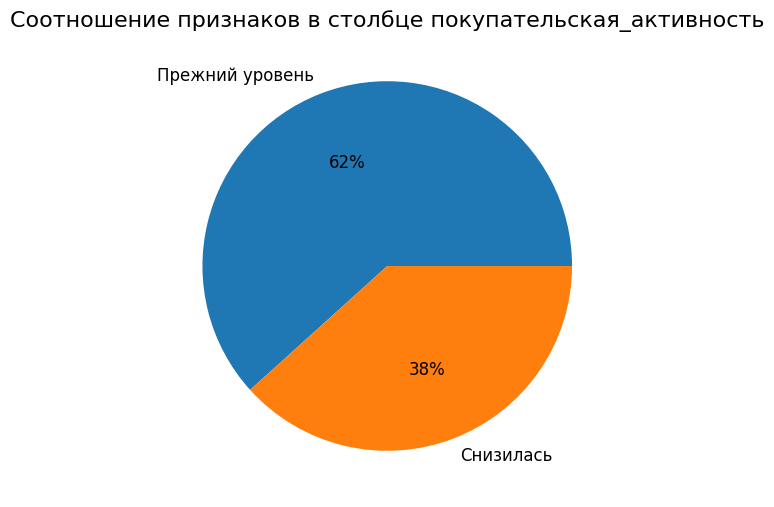

In [30]:
# Построим круговую диаграмму для столбца "покупательская_активность"
object_pie(df_file, 'покупательская_активность')

Итак, на диаграмме мы можем наблюдать, что клиенты разделены на два класса покупательской активности : «снизилась» или «прежний уровень», значит нам предстоит решить задачу бинарной классификации. У целевого признака наблюдается незначительный дисбаланс классов - так, у 62% клиентов покупательская активность осталась на прежнем уровне, тогда как у 38% клиентов покупательская активность снизилась. При построении моделей учтем наличие дисбаланса классов у нашего целевого признака. 

Рассмотрим категориальный признак <code>тип_сервиса</code> - уровень сервиса.

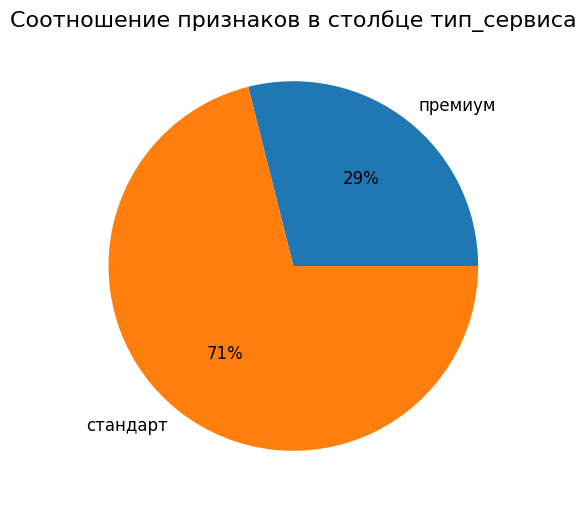

In [31]:
# Построим круговую диаграмму для столбца "тип_сервиса"
object_pie(df_file, 'тип_сервиса')

Итак, на диаграмме мы можем наблюдать наличие двух типов сервиса для клиентов: «стандарт» и «премиум». 
Наибольшая доля клиентов - 71% имеет стандартный тип сервиса, тогда как клиенты с типом сервиса премиум составляют 29%. 

Рассмотрим категориальный признак <code>разрешить_сообщать</code> -  информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.

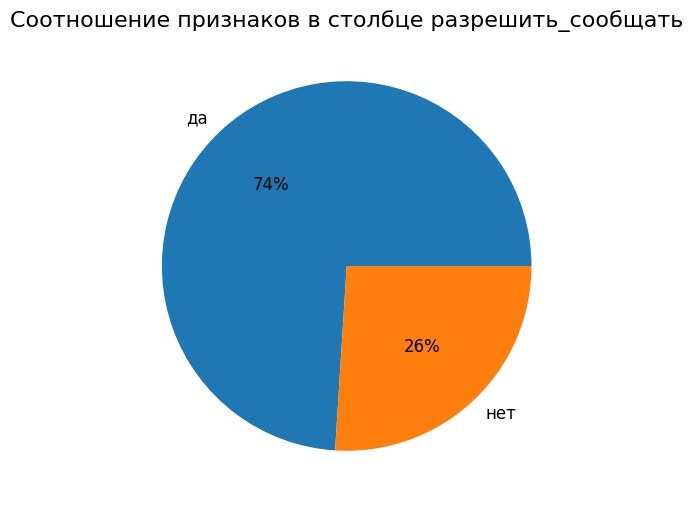

In [32]:
# Построим круговую диаграмму для столбца "разрешить_сообщать"
object_pie(df_file, 'разрешить_сообщать')

Итак, на диаграмме мы видим, что подавляющее большинство клиентов - 74% дало согласие на получение дополнительных предложений о товаре, тогда как 26% не подтвердили согласие. 

Рассмотрим категориальный признак <code>популярная_категория</code> - самая популярная категория товаров у покупателя за последние 6 месяцев.

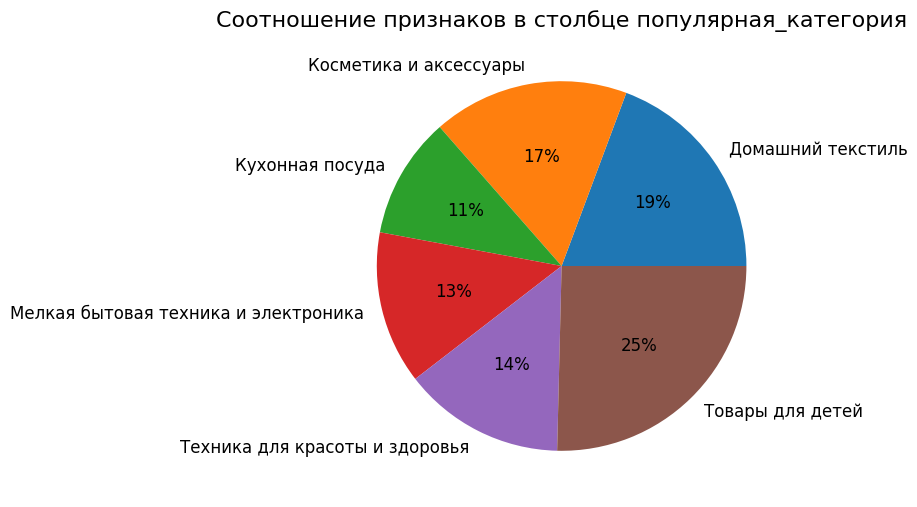

In [33]:
# Построим круговую диаграмму для столбца "популярная_категория"
object_pie(df_file, 'популярная_категория')

Итак, на диаграмме представлено 6 категорий товаров, среди которых наибольшей популярностью за последние 6 месяцев пользуются «Товары для детей» - их доля составляет 25%. На втором месте расположились товары категории «Домашний текстиль» - 19%, на третьем месте товары категории «Косметика и аксессуары» - 17%. Товары категорий «Техника для красоты и здоровья» и «Мелкая бытовая техника и электроника» расположились на четвертом и пятом местах, с долями 14 и 13% соответственно, и на последнем месте находятся товары категории  «Кухонная посуда» с долей 11%. 

Можно отметить явное преобладание товаров категории «Товары для детей», тогда как разница между соседствующими по объему категориями составляет 1-2%, «Товары для детей» преобладают над второй по объему категорией «Домашний текстиль» уже на 6%. 

Рассмотрим количественный признак <code>маркет_актив_шесть_мес</code> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев.

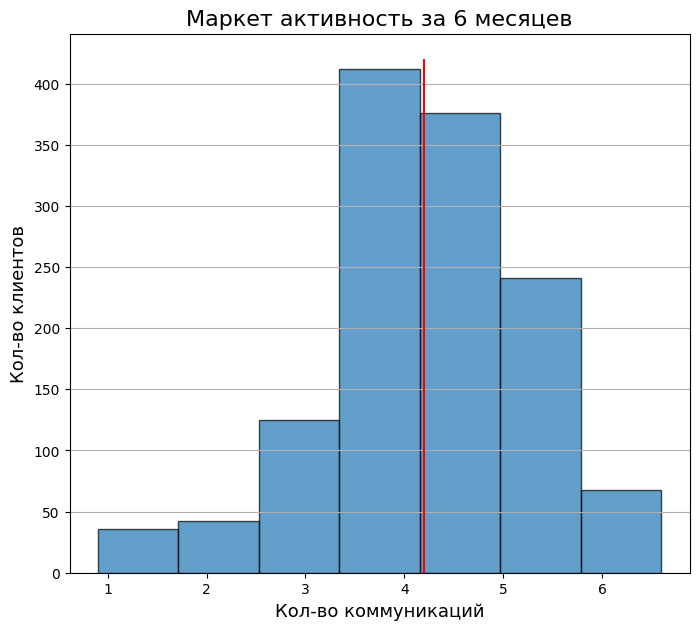

In [34]:
# Построим гистограмму 
df_file['маркет_актив_шесть_мес'].hist(bins=7, figsize=(8,7), alpha=0.7, edgecolor='black')

# Отобразим медиану
plt.vlines(df_file['маркет_актив_шесть_мес'].median(), ymin=0, ymax=420, color='red', label='Медиана')

# Зададим параметры графику
plt.legend
plt.title('Маркет активность за 6 месяцев', fontsize=16)
plt.xlabel('Кол-во коммуникаций', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(False, axis='x')
plt.show()

Среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента. На графике мы можем видеть, что для наибольшего числа клиентов приходится 4 маркетинговые активности в месяц, это же значение является и средним. Распределение приближенно к нормальному, с небольшим смещением вправо. Минимальное среднемесячное значение составляет 0.9, а максимальное 6.6

Рассмотрим дискретный признак <code>маркет_актив_тек_мес</code> — количество маркетинговых коммуникаций в текущем месяце.

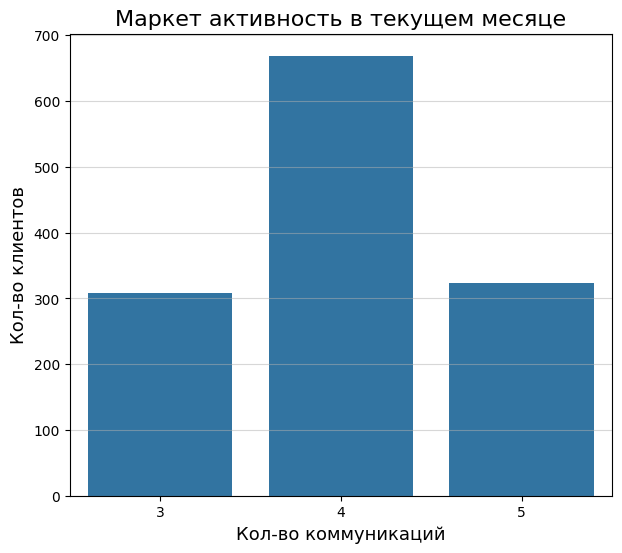

In [35]:
# Построим график для дискретного признака
plt.figure(figsize=(7, 6))
sns.countplot(x='маркет_актив_тек_мес', data=df_file, order=sorted(df_file['маркет_актив_тек_мес'].unique()))

# Зададим параметры графику
plt.legend
plt.title('Маркет активность в текущем месяце', fontsize=16)
plt.xlabel('Кол-во коммуникаций', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

Итак, в текущем месяце для наибольшего числа клиентов приходится 4 маркетинговые активности, это же значение является и средним. Наименьшее число активностей cоставило 3, а наибольшее - 5.  

Рассмотрим количественный признак <code>длительность</code> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

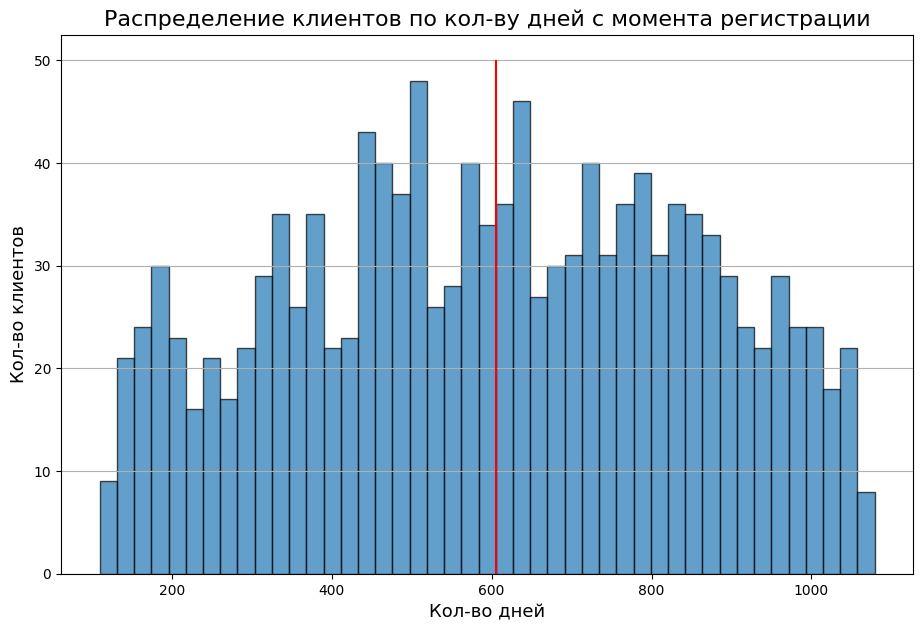

In [36]:
# Построим гистограмму 
df_file['длительность'].hist(bins=45, figsize=(11,7), alpha=0.7, edgecolor='black')

# Отобразим медиану
plt.vlines(df_file['длительность'].median(), ymin=0, ymax=50, color='red', label='Медиана')

# Зададим параметры графику
plt.legend
plt.title('Распределение клиентов по кол-ву дней с момента регистрации', fontsize=16)
plt.xlabel('Кол-во дней', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(False, axis='x')
plt.show()

Итак, на графике мы можем отметить, что среднее кол-во дней с момента регистрации клиента на сайте составляет 600 дней, что составляет чуть более полутора лет. распределение похоже на нормальное, аномальных значений не обнаружено. Максимальный срок с момента регистрации составляет около 1100 дней (порядка 3-х лет), а минимальный 100 дней (чуть более 3-х месяцев). 

Рассмотрим количественный признак <code>акционные_покупки</code> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

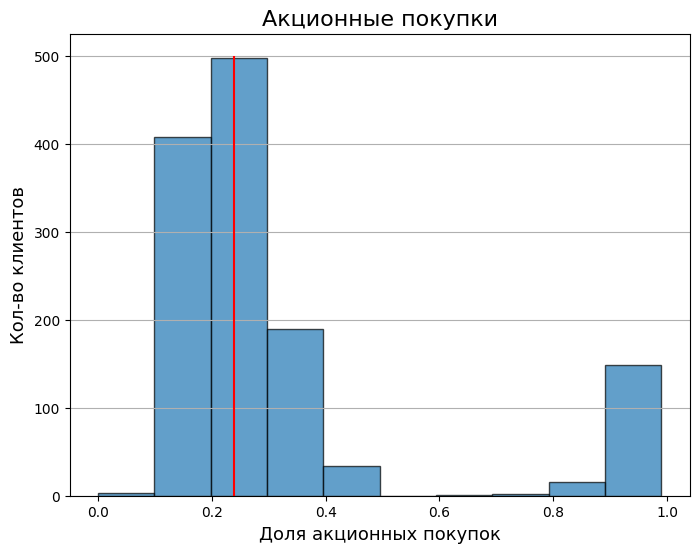

In [37]:
# Построим гистограмму 
df_file['акционные_покупки'].hist(bins=10, figsize=(8,6), alpha=0.7, edgecolor='black')

# Отобразим медиану
plt.vlines(df_file['акционные_покупки'].median(), ymin=0, ymax=500, color='red', label='Медиана')

# Зададим параметры графику
plt.legend
plt.title('Акционные покупки', fontsize=16)
plt.xlabel('Доля акционных покупок', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(False, axis='x')
plt.show()

Итак, за последние 6 месяцев у большинства клиентов доля акционных покупок порядка 0.25 (25%) от общего числа покупок, это же значение является и средним. У заметного числа клиентов акционные покупки составляют от 0.1 до 0.3 (10-30%) от общего числа покупок. Так же можно заметить порядка 150 клиентов, у которых практически все покупки приходятся на товары по акции. 

Рассмотрим дискретный признак <code>средний_просмотр_категорий_за_визит</code> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

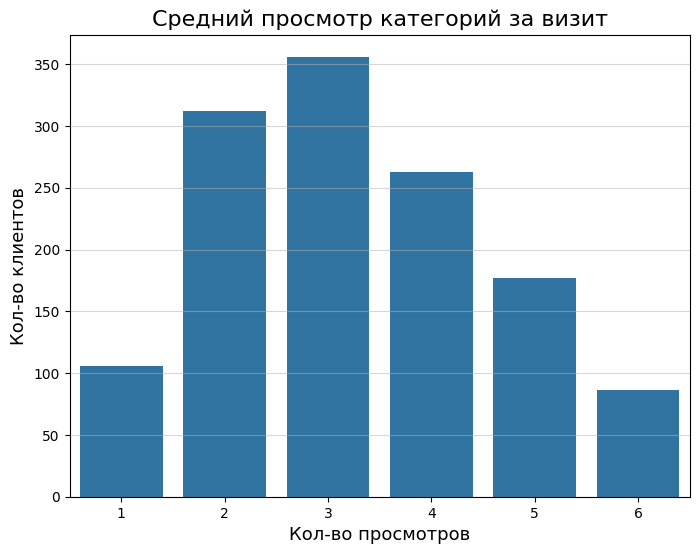

In [38]:
# Построим график для дискретного признака
plt.figure(figsize=(8, 6))
sns.countplot(x='средний_просмотр_категорий_за_визит', data=df_file, order=sorted(df_file['средний_просмотр_категорий_за_визит'].unique()))

# Зададим параметры графику
plt.legend
plt.title('Средний просмотр категорий за визит', fontsize=16)
plt.xlabel('Кол-во просмотров', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

Итак, на графике мы можем отметить, что за последний месяц клиент в среднем за визит просматривает 3 категории, это же значение присуще для большинства клиентов. Максимально среднее кол-во просматриваемых категорий за визит составляет 6, а минимальное - 1 категория. на графике мы видим нормальное распределение.

Рассмотрим дискретный признак <code>неоплаченные_продукты_штук_квартал</code> — общее число неоплаченных товаров в корзине за последние 3 месяца.

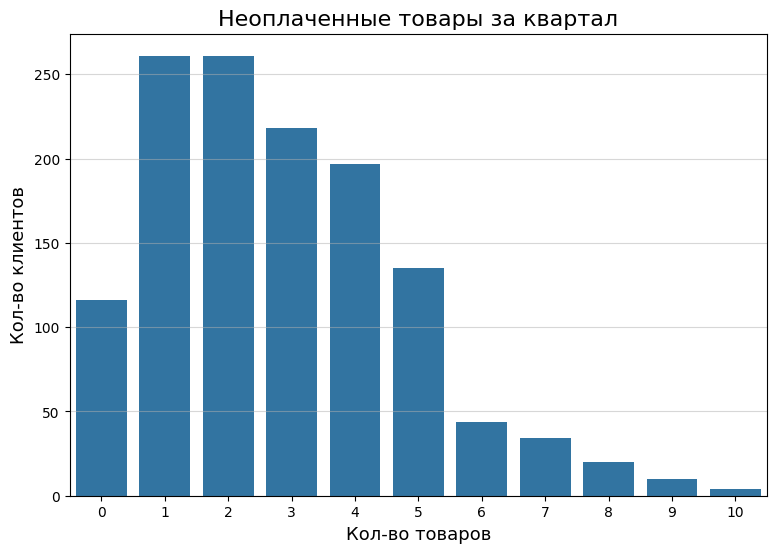

In [39]:
# Построим график для дискретного признака
plt.figure(figsize=(9, 6))
sns.countplot(x='неоплаченные_продукты_штук_квартал', data=df_file, order=sorted(df_file['неоплаченные_продукты_штук_квартал'].unique()))

# Зададим параметры графику
plt.legend
plt.title('Неоплаченные товары за квартал', fontsize=16)
plt.xlabel('Кол-во товаров', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

Итак, за последние 3 месяца у наибольшего числа покупателей кол-во неоплаченных товаров в корзине составляет от 1-го до 2-х. Максимальное число неоплаченных товаров в корзине составляет 10. Примерно у 110 клиентов отсутствуют неоплаченные товары в корзине. Данный график нам показывает, что практически у всех клиентов имеются неоплаченные товары в корзине. Возможно следует изучить содержимое корзин покупателей и попробовать выяснить причину, по которой они не совершают покупку, тем самым найти способ побудить клиентов завершить покупку.

Рассмотрим дискретный признак <code>ошибка_сервиса</code> — число сбоев, которые коснулись покупателя во время посещения сайта.

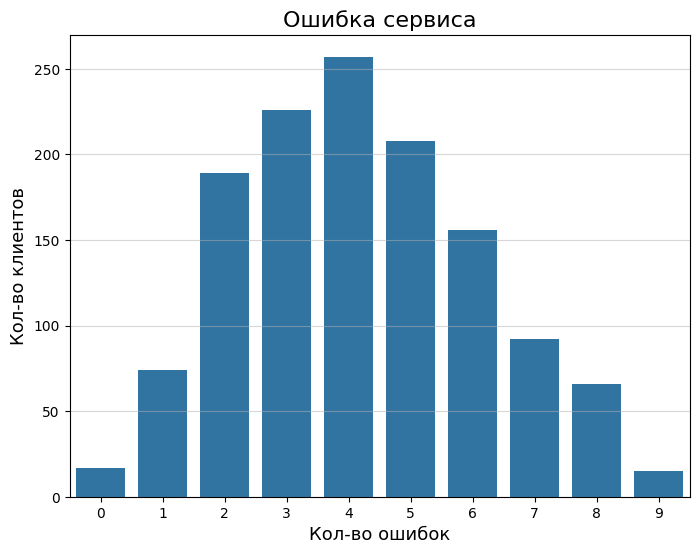

In [40]:
# Построим график для дискретного признака
plt.figure(figsize=(8, 6))
sns.countplot(x='ошибка_сервиса', data=df_file, order=sorted(df_file['ошибка_сервиса'].unique()))

# Зададим параметры графику
plt.legend
plt.title('Ошибка сервиса', fontsize=16)
plt.xlabel('Кол-во ошибок', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

Наибольшее число покупателей касаются с 4 сбоями во время посещения сайта, это же значение является и средним. Наибольшее число сбоев на клиента во время посещения сайта составляет 9, а наименьшее - 0, данные показатели довольно малочисленны. График нам показывает, что практически все клиенты сталкиваются с разным кол-вом сбоев во время посещения сайта, что может негативно сказаться на опыте пользования и завершения покупки на сайте. Данную информацию следует передать в технический отдел, для улучшения оптимизации работы сайта.

Рассмотрим дискретный признак <code>страниц_за_визит</code> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

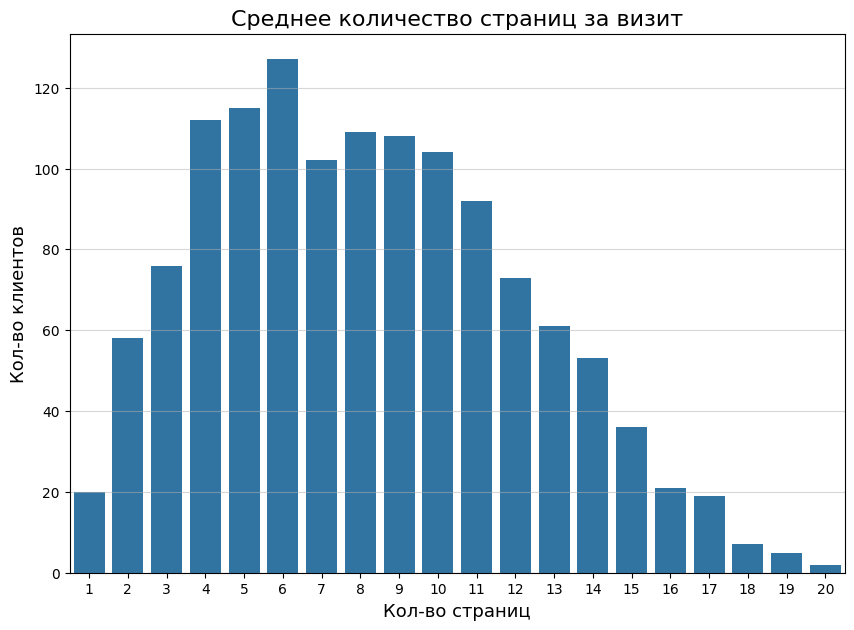

In [41]:
# Построим график для дискретного признака
plt.figure(figsize=(10, 7))
sns.countplot(x='страниц_за_визит', data=df_file, order=sorted(df_file['страниц_за_визит'].unique()))

# Зададим параметры графику
plt.legend
plt.title('Среднее количество страниц за визит', fontsize=16)
plt.xlabel('Кол-во страниц', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

За последние 3 месяца пользователи в среднем просматривают за один визит 8 страниц с товарами. Наибольшее число страниц за визит составляет 20, а наименьшее - 1 страница. Подавляющее большинство пользователей просматривают от 4 до 11 страниц за визит. 

### Проведем исследовательский анализ признаков датасета <code>df_money</code>

Рассмотрим категориальный признак <code>период</code> - название периода, во время которого зафиксирована выручка.

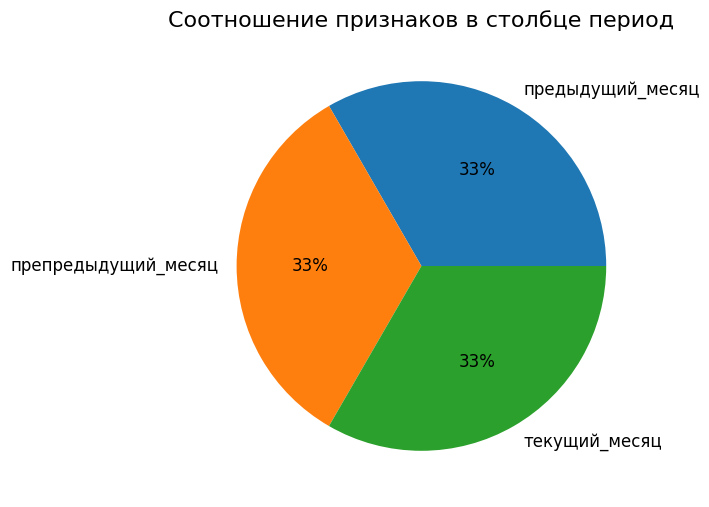

In [42]:
# Построим круговую диаграмму для столбца "период"
object_pie(df_money, 'период')

Итак, на диаграмме мы видим равномерное распределение долей по периодам, во время которых была зафиксирована выручка. 

Рассмотрим количественный признак <code>выручка</code> — сумма выручки за период.

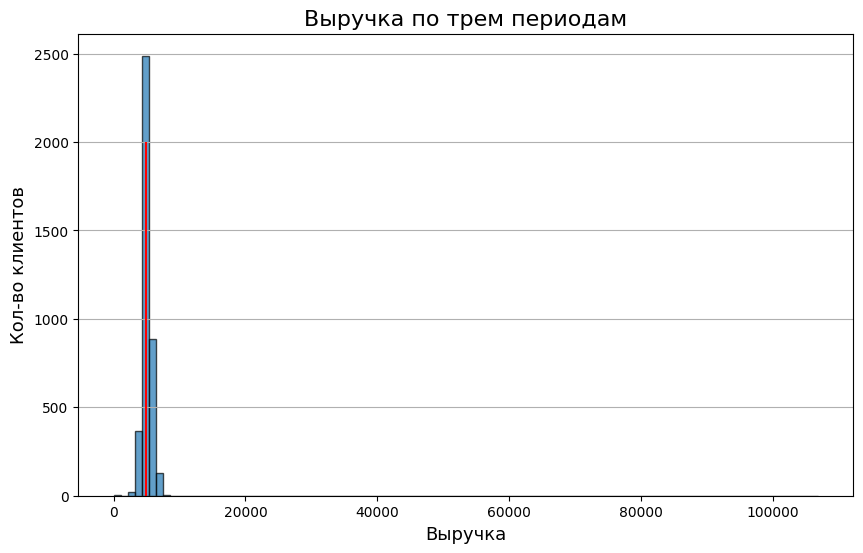

In [43]:
# Построим гистограмму 
df_money['выручка'].hist(bins=100, figsize=(10,6), alpha=0.7, edgecolor='black')

# Отобразим медиану
plt.vlines(df_money['выручка'].median(), ymin=0, ymax=2000, color='red', label='Медиана')

# Зададим параметры графику
plt.legend
plt.title('Выручка по трем периодам', fontsize=16)
plt.xlabel('Выручка', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(False, axis='x')
plt.show()

Итак, на графике мы видим наличие выброса в районе отметки 100000. Выведем это значение.

In [44]:
# Выведем строки, в которых выручка более 10000
df_money.query('выручка > 10000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


Итак, мы имеем одного клиента, который совершил покупку в текущем месяце на сумму 106862.2., которое является аномальным значением. Заменим его медианым значением. 

In [45]:
df_money['выручка'] = df_money['выручка'].replace(106862.2, df_money['выручка'].median())

df_money.query('id == 215380')

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,4957.5


Данные корректны, аномальных значений нет.  Построим повторно гистограмму. 

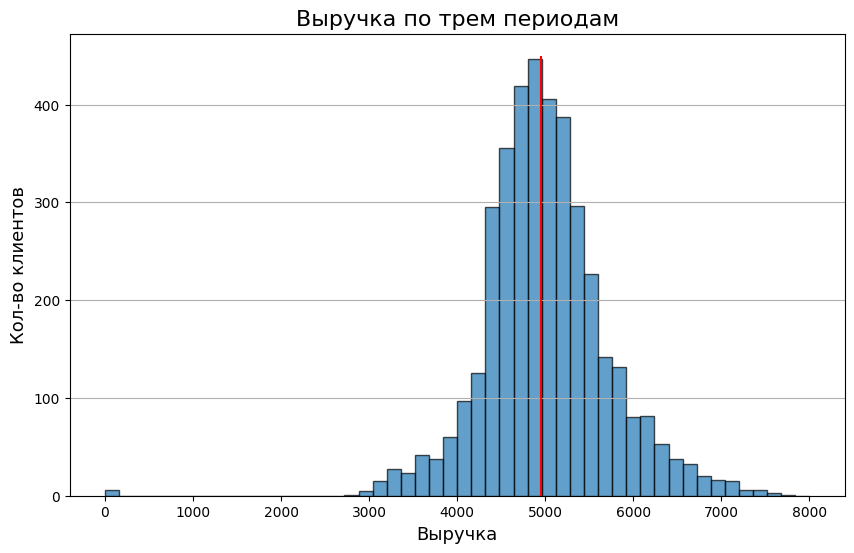

In [46]:
# Построим гистограмму 
df_money['выручка'].hist(bins=50, figsize=(10,6), alpha=0.7, edgecolor='black', range=(0, 8000))

# Отобразим медиану
plt.vlines(df_money['выручка'].median(), ymin=0, ymax=450, color='red', label='Медиана')

# Зададим параметры графику
plt.legend
plt.title('Выручка по трем периодам', fontsize=16)
plt.xlabel('Выручка', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(False, axis='x')
plt.show()

Итак, мы можем наблюдать нормальное распределение. Наибольшее число покупателей совершают покупки на сумму около 5000 руб., это же значение является и средним. Так же можно отметить, что обычно за период один клиент приносит выручку от 2700 до 7800 руб. Есть клиенты, которые не совершили покупки в двух предыдущих периодах - удалим данных неактивных пользователей из датасета.

In [47]:
# Выведем неактивных пользователей
df_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [48]:
# Удалим из датасета df_money неактивных пользователей с id 215348, 215357 и 215359
df_money = df_money.query('id != [215348, 215357, 215359]')

# Удалим из датасета df_file неактивных пользователей с id 215348, 215357 и 215359
df_file = df_file.query('id != [215348, 215357, 215359]')

In [49]:
df_money['выручка'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
выручка,3891.0,5007.529041,679.1489,2758.7,4592.0,4959.0,5363.0,7799.4


Мы успешно очистили датасет от аномальных значений и неактивных пользователей. 

### Проведем исследовательский анализ признаков датасета <code>df_time</code>

Рассмотрим категориальный признак <code>период</code> - название периода, во время которого зафиксировано общее время.

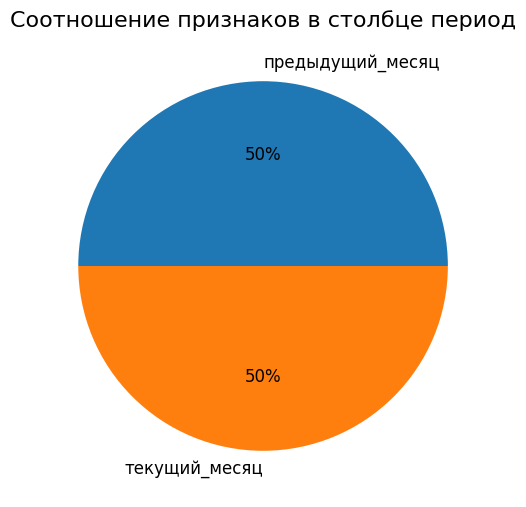

In [50]:
# Построим круговую диаграмму для столбца "период"
object_pie(df_time, 'период')

Итак, на диаграмме мы видим равномерное распределение долей по периодам, во время которых зафиксировано общее время. 

Рассмотрим количественный признак <code>минут</code> — значение времени, проведённого на сайте, в минутах.

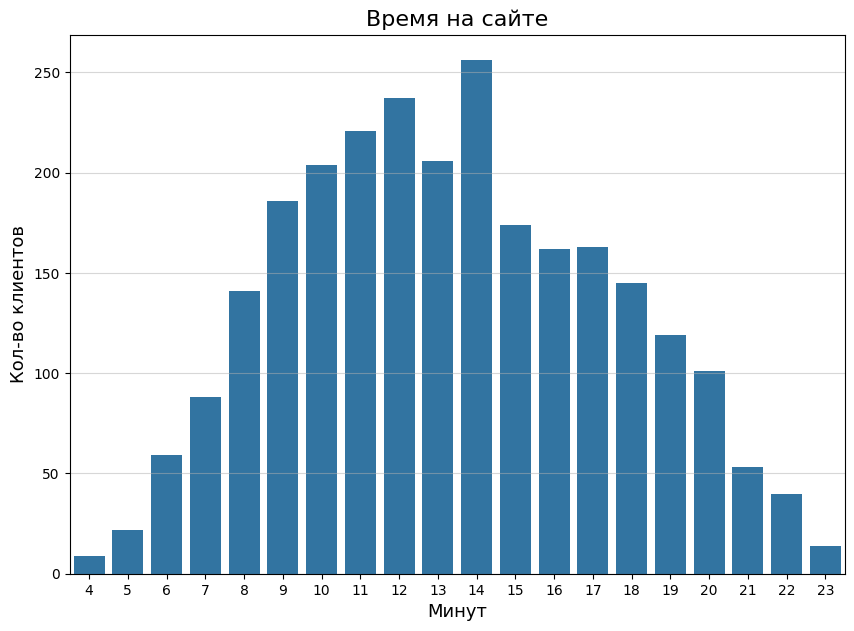

In [51]:
# Построим график для дискретного признака
plt.figure(figsize=(10, 7))
sns.countplot(x='минут', data=df_time, order=sorted(df_time['минут'].unique()))

# Зададим параметры графику
plt.legend
plt.title('Время на сайте', fontsize=16)
plt.xlabel('Минут', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

Итак, мы видим нормальное распределение. В среднем пользователи на сайте проводят порядка 13 минут в месяц. Максимальное время на сайте составляет 23 минуты, а минимальное 4 минуты. 

### Проведем исследовательский анализ признаков датасета <code>df_tm_money</code>

Рассмотрим количественный признак <code>прибыль</code> — данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

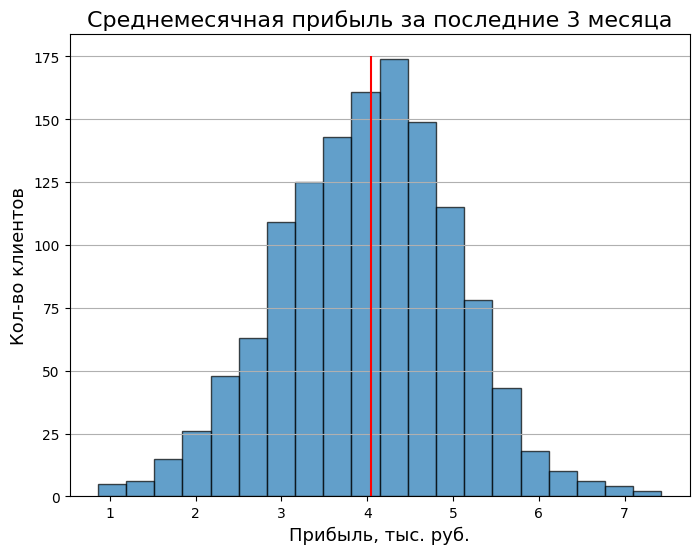

In [52]:
# Построим гистограмму 
df_tm_money['прибыль'].hist(bins=20, figsize=(8,6), alpha=0.7, edgecolor='black')

# Отобразим медиану
plt.vlines(df_tm_money['прибыль'].median(), ymin=0, ymax=175, color='red', label='Медиана')

# Зададим параметры графику
plt.legend
plt.title('Среднемесячная прибыль за последние 3 месяца', fontsize=16)
plt.xlabel('Прибыль, тыс. руб.', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(False, axis='x')
plt.show()

Итак, на графике мы видим нормальное распределение. Среднемесячная прибыль с одного клиента за последние три месяца составляет порядка 4 тыс. руб. Наибольший среднемесячный показатель прибыли с одного клиента составляет 7.4 тыс. руб., а минимальный 860 руб. 

### Промежуточный вывод:

**Провели исследовательский анализ датасета <code>df_file</code> и выявили следующее:**

- У целевого признака <code>покупательская_активность</code> наблюдается незначительный дисбаланс классов - так, у 62% клиентов покупательская активность осталась на прежнем уровне, тогда как у 38% клиентов покупательская активность снизилась.

- Наибольшая доля клиентов - 71% имеет стандартный тип сервиса, тогда как клиенты с типом сервиса премиум составляют 29%.

- Большинство клиентов - 74% дало согласие на получение дополнительных предложений о товаре, тогда как 26% не подтвердили согласие.

- Наибольшей популярностью за последние 6 месяцев пользуются «Товары для детей» - их доля составляет 25%. На втором месте расположились товары категории «Домашний текстиль» - 19%, на третьем месте товары категории «Косметика и аксессуары» - 17%. Товары категорий «Техника для красоты и здоровья» и «Мелкая бытовая техника и электроника» расположились на четвертом и пятом местах, с долями 14 и 13% соответственно, и на последнем месте находятся товары категории «Кухонная посуда» с долей 11%. 

- За последние 6 месяцев для наибольшего числа клиентов приходится 4 маркетинговые активности, это же значение является и средним. В текущем месяце ситуация аналогичная.

- Среднее кол-во дней с момента регистрации клиента на сайте составляет 600 дней, что составляет чуть более полутора лет. Максимальный срок с момента регистрации составляет около 1100 дней (порядка 3-х лет), а минимальный 100 дней (чуть более 3-х месяцев).

- За последние 6 месяцев у большинства клиентов доля акционных покупок порядка 0.25 (25%) от общего числа покупок, это же значение является и средним. У заметного числа клиентов акционные покупки составляют 10-30% от общего числа покупок. Имеются около 150 клиентов, у которых практически все покупки приходятся на товары по акции.

- За последний месяц клиент в среднем за визит просматривает 3 категории, это же значение присуще для большинства клиентов. Максимально среднее кол-во просматриваемых категорий за визит составляет 6, а минимальное - 1 категория. 

- За последние 3 месяца практически у всех клиентов имеются неоплаченные товары в корзине (у наибольшего числа покупателей кол-во неоплаченных товаров в корзине составляет от 2-х до 3-х). Возможно следует изучить содержимое корзин покупателей и попробовать выяснить причину, по которой они не совершают покупку, тем самым найти способ побудить клиентов завершить покупку.

- Практически все клиенты сталкиваются с разным кол-вом сбоев во время посещения сайта, в среднем на клиента приходится 4 сбоя. Это может негативно сказаться на опыте пользования и завершения покупки на сайте. Данную информацию следует передать в технический отдел, для улучшения оптимизации работы сайта.

- За последние 3 месяца подавляющее большинство пользователей просматривают от 4 до 11 страниц за визит. В среднем просматривают за один визит 8 страниц с товарами.


**Провели исследовательский анализ датасета <code>df_money</code> и выявили следующее:**

- Наибольшее число покупателей совершают покупки на сумму около 5000 руб., это же значение является и средним. Есть три клиента, которые не совершили покупки в двух предыдущих периодах. Так же можно отметить, что обычно за период один клиент приносит выручку от 2700 до 7800 руб. 
- Нашли выброс в значении выручки по клиенту <code>id 215380</code>, с помощью датасета <code>df_tm_money</code> нашли корректное значение выручки по данному клиенту за текущий период.

**Провели исследовательский анализ датасета <code>df_time</code> и выявили следующее:**

- В среднем пользователи на сайте проводят порядка 13 минут в месяц. Максимальное время на сайте составляет 23 минуты, а минимальное 4 минуты.

**Провели исследовательский анализ датасета <code>df_tm_money</code> и выявили следующее:**

- Среднемесячная прибыль с одного клиента за последние три месяца составляет порядка 4 тыс. руб. Наибольший среднемесячный показатель прибыли с одного клиента составляет 7.4 тыс. руб., а минимальный 860 руб.

<a id='four_id'></a>
## Объединение таблиц

Добавим в датасет <code>df_file</code> новые столбцы с выручкой и временем на сайте за каждый отдельный период. 

In [53]:
# Запишем в переменные отдельно данные за текущий и предыдущий месяц датасета df_time
# Столбец id будем использовать в качестве индекса
current_month_time = df_time[df_time['период'] == 'текущий_месяц'].set_index('id')['минут']

previous_month_time = df_time[df_time['период'] == 'предыдущий_месяц'].set_index('id')['минут']

# Запишем в переменные отдельно данные за текущий, предыдущий и препредыдущий месяц датасета df_money
# Столбец id будем использовать в качестве индекса
current_month_money = df_money[df_money['период'] == 'текущий_месяц'].set_index('id')['выручка']

previous_month_money = df_money[df_money['период'] == 'предыдущий_месяц'].set_index('id')['выручка']

prev_previous_month_money = df_money[df_money['период'] == 'препредыдущий_месяц'].set_index('id')['выручка']

In [54]:
# Добавим столбцы со временем на сайте по каждому периоду отдельно
df_file['минут_текущий_месяц'] = df_file['id'].map(current_month_time)
df_file['минут_предыдущий_месяц'] = df_file['id'].map(previous_month_time)

# Добавим столбцы с выручкой по каждому периоду отдельно
df_file['выручка_текущий_месяц'] = df_file['id'].map(current_month_money)
df_file['выручка_предыдущий_месяц'] = df_file['id'].map(previous_month_money)
df_file['выручка_препредыдущий_месяц'] = df_file['id'].map(prev_previous_month_money)

In [55]:
# Столбец 'id' сделаем индексным
df_file = df_file.set_index('id')

# Выведем информацию о датасете и случайные 5 строк датасета 
info_data(df_file)

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   покупательская_активность            1297 non-null   category
 1   тип_сервиса                          1297 non-null   category
 2   разрешить_сообщать                   1297 non-null   category
 3   маркет_актив_шесть_мес               1297 non-null   float64 
 4   маркет_актив_тек_мес                 1297 non-null   int64   
 5   длительность                         1297 non-null   int64   
 6   акционные_покупки                    1297 non-null   float64 
 7   популярная_категория                 1297 non-null   category
 8   средний_просмотр_категорий_за_визит  1297 non-null   int64   
 9   неоплаченные_продукты_штук_квартал   1297 non-null   int64   
 10  ошибка_сервиса                       1297 non-null   int64   
 11  страниц_за_визи

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_шесть_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_текущий_месяц,минут_предыдущий_месяц,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц
id,,,,,,,,,,,,,,,,,
216604,Прежний уровень,стандарт,да,4.9,5,350,0.99,Домашний текстиль,3,4,5,5,14,14,4840.1,4545.0,4735.0
216104,Прежний уровень,стандарт,нет,4.1,4,629,0.13,Домашний текстиль,3,0,6,14,17,14,4107.8,4626.5,5375.0
216218,Прежний уровень,стандарт,да,5.8,4,345,0.12,Техника для красоты и здоровья,5,3,3,9,12,7,5561.8,5378.5,5317.0
215851,Прежний уровень,стандарт,да,4.1,4,530,0.26,Домашний текстиль,2,5,4,13,11,17,4676.0,4903.5,5316.0
216442,Прежний уровень,стандарт,да,3.8,4,907,0.13,Косметика и аксессуары,2,1,8,4,20,13,3085.4,3829.0,4837.0


(None, None)

Мы успешно добавили в датасет <code>df_file</code> новые столбцы с выручкой за текущий, предыдущий и препредыдущий месяцы, а так же столбцы со временем на сайте за текущий и предыдущий месяцы. Столбец <code>id</code> сделали индексным.

<a id='five_id'></a>
## Корреляционный анализ

Рассчитаем коэффициент **корреляции Фи**, он поможет нам найти взаимосвязь между категориальными и количественными признаками. 

In [56]:
# Создадим список с названиями количественных признаков
num_columns_cor = [
    'маркет_актив_шесть_мес', 'длительность', 
    'акционные_покупки', 'выручка_препредыдущий_месяц', 
    'выручка_предыдущий_месяц', 'выручка_текущий_месяц'
]

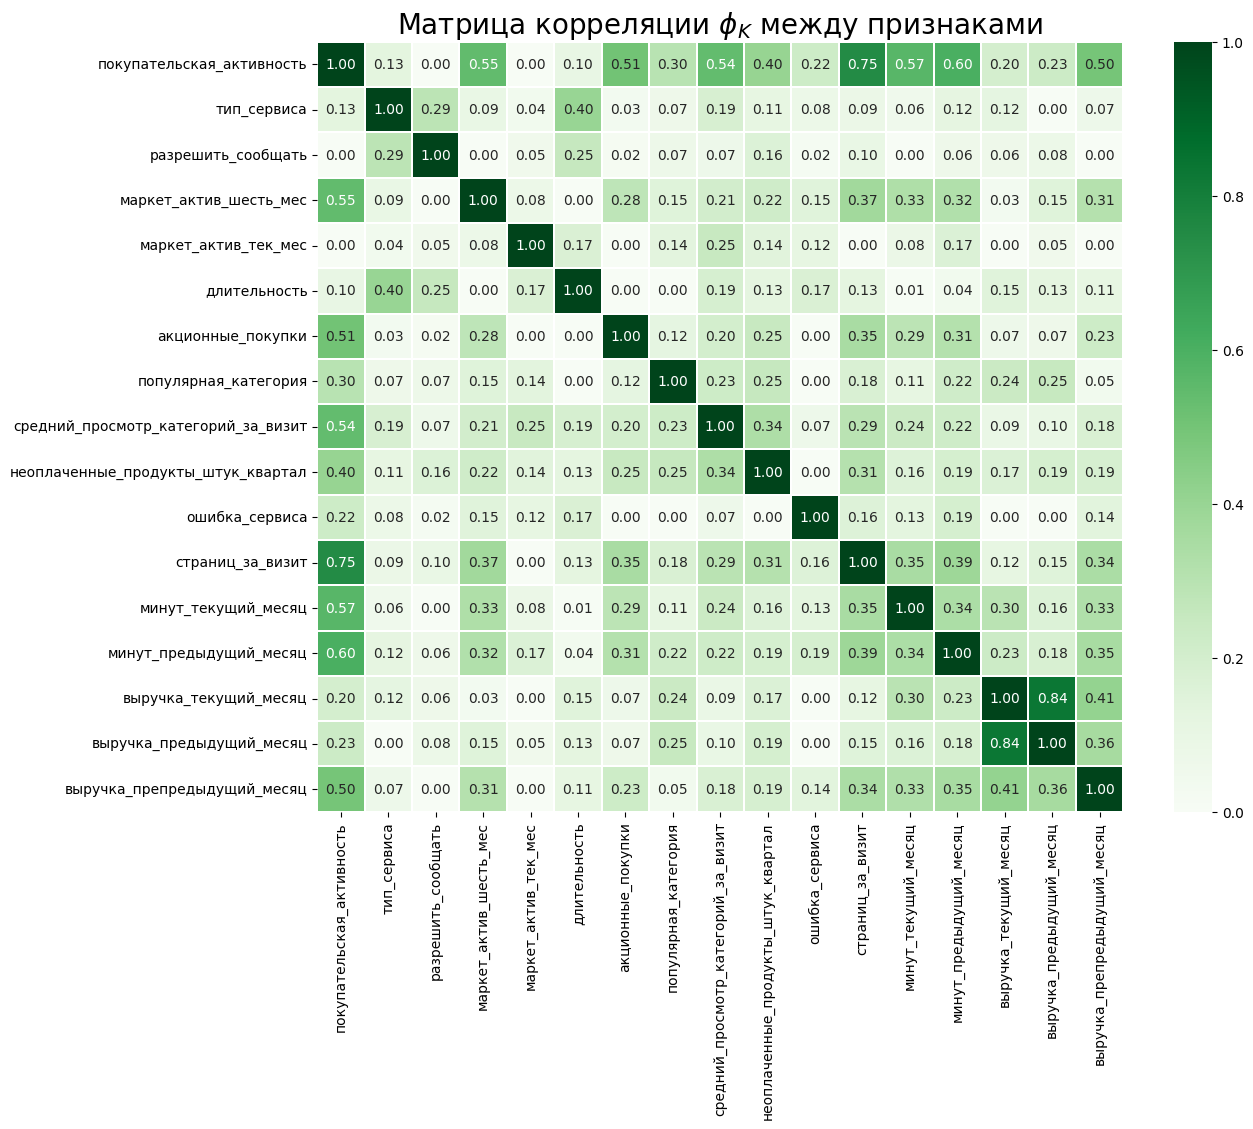

In [57]:
# Построим матрицу корреляции с помощью тепловой карты heatmap
plt.figure(figsize=(13, 10))
sns.heatmap(df_file.phik_matrix(interval_cols=num_columns_cor), 
            annot=True, fmt='.2f', cmap='Greens', linewidths=0.1)
plt.title('Матрица корреляции $\phi_K$ между признаками', fontsize=20)
plt.show()

Темные тона говорят о сильной связи, а светлые — о слабой. Чем ближе значение к 1, тем сильнее связь. 

**С целевым признаком <code>покупательская_активность</code>**:

*Сильную связь* имеют входные признаки:
- <code>страниц_за_визит</code> (коэф. 0.75)
- <code>минут_предыдущий_месяц</code> (коэф. 0.60)

*Заметную связь* имеют входные признаки: 
- <code>минут_текущий_месяц</code> (коэф. 0.57)
- <code>маркет_актив_шесть_мес</code> (коэф. 0.55)
- <code>средний_просмотр_категорий_за_визит</code> (коэф. 0.54)
- <code>акционные_покупки</code> (коэф. 0.50)
- <code>выручка_препредыдущий_месяц</code> (коэф. 0.50)
- <code>неоплаченные_продукты_штук_квартал</code> (коэф. 0.40)

*Умеренную связь* имеют входные признаки:
- <code>популярная_категория</code> (коэф. 0.30)
- <code>выручка_предыдущий_месяц</code> (коэф. 0.23)
- <code>ошибка_сервиса</code> (коэф. 0.22)

*Слабую связь* имеют входные признаки:
- <code>выручка_текущий_месяц</code> (коэф. 0.20)
- <code>тип_сервиса</code> (коэф. 0.13)
- <code>длительность</code> (коэф. 0.09)

*Связь отсутствует* с входными признаками: 
- <code>разрешить_сообщать</code>
- <code>маркет_актив_тек_мес</code>

<a id='six_id'></a>
## Подготовка пайплайнов

В качестве целевого признака используем столбец <code>покупательская_активность</code>. Он имеет только два значения:<code>снизилась</code> и <code>прежний уровень</code> - это задача бинарной классификации.  

Разобьем данные на тренировочную и тестовую выборки.

In [58]:
# Сохраним входные признаки в переменную X
X = df_file.drop(['покупательская_активность'], axis=1)

# Сохраним целевой признак в переменную y
y = df_file['покупательская_активность']

# Разобьем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.25,
    random_state = 42, 
    stratify = y
)

Закодируем целевой признак методом `LabelEncoder.`

In [59]:
# Закодируем тренировочную и тестовую выборки с целевым признаком
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test) 

In [60]:
# Выведем отсортированные классы 
label_encoder.classes_

array(['Прежний уровень', 'Снизилась'], dtype=object)

Итак, кодировщик закодировал значения целевого признака следующим образом: 
- `0` - Прежний уровень 
- `1` - Снизилась

Создадим списки с названиями признаков для кодирования и масштабирования.

In [61]:
# В переменную ohe_columns запишем категориальные признаки для OneHotEncoder
ohe_columns = ['популярная_категория']

# В переменную ord_columns запишем категориальные ранговые признаки для OrdinalEncoder
ord_columns = ['тип_сервиса', 'разрешить_сообщать']

In [62]:
# В переменную num_columns запишем количественные признаки
num_columns = ['маркет_актив_шесть_мес', 'маркет_актив_тек_мес', 'длительность', 
               'акционные_покупки', 'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса','страниц_за_визит', 
               'минут_текущий_месяц', 'минут_предыдущий_месяц','выручка_текущий_месяц', 
               'выручка_предыдущий_месяц','выручка_препредыдущий_месяц']

Cоздадим пайплайн для подготовки данных.

In [63]:
# Создадим пайплайн ohe_pipe для кодирования OneHotEncoder
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [64]:
# Создадим пайплайн ord_pipe для кодирования OrdinalEncoder
ord_pipe = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)), 
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

In [65]:
# Создадим общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns), 
        ('ord', ord_pipe, ord_columns), 
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# Cоздаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor), 
    ('models', SVC(random_state=42, probability=True))
])

In [66]:
# Cоздаём список моделей с гиперпараметрами
param_grid = [
    # словарь для модели DecisionTreeClassifier()    
    {
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }, 
    
    # словарь для модели KNeighborsClassifier()    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }, 
    
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=42)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }, 
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=42, probability=True)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]

При подборе гиперпараметров будем использовать метрику <code>ROC-AUC</code> - данная метрика хорошо себя проявляет, когда объектов с одним значением целевого признака больше, чем с другими, а как мы ранее выяснили, у нас наблюдается дисбаланс целевого признака (у 62% клиентов покупательская активность осталась на прежнем уровне, тогда как у 38% клиентов покупательская активность снизилась).

In [67]:
# Используем GridSearchCV
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

In [68]:
# Обучаем модели
grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:', grid_search.best_params_)
print ('Метрика ROC-AUC лучшей модели на кросс-валидации:', grid_search.best_score_)

Лучшая модель и её параметры: {'models': SVC(probability=True, random_state=42), 'preprocessor__num': StandardScaler()}
Метрика ROC-AUC лучшей модели на кросс-валидации: 0.9146881815699996


Проверим работу лучшей модели на тестовой выборке и рассчитаем прогноз на тестовых данных.

In [69]:
# Сделаем предсказания лучшей моделью 
y_pred = grid_search.predict(X_test)

# Получим предсказания меток старшего класса и выведем метрику
y_proba = grid_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_proba), 3)}')

Метрика ROC-AUC на тестовой выборке: 0.918


Проверим нашу лучшую модель на адекватность, сравнив качество её предсказаний с качеством константной модели `DummyClassifier`.

In [70]:
# Обучим модель DummyClassifier
dummy = DummyClassifier(random_state=42)

dummy.fit(X_train, y_train)

# Выведем метрику ROC-AUC
y_dummy_proba = dummy.predict_proba(X_test)[:, 1]

print(f'Метрика ROC-AUC константной модели на тестовой выборке: {round(roc_auc_score(y_test, y_dummy_proba), 2)}')

Метрика ROC-AUC константной модели на тестовой выборке: 0.5


Итак, мы получили метрику `ROC-AUC 0.92` нашей **лучшей модели** на тестовых данных и метрику `ROC-AUC 0.5` **константной модели**. Мы получили результат тестирования нашей лучшей модели на тествой выборке лучше, чем результат константной модели на 0.42.


Итак, с помощью пайпланов и инструмента по подбору гиперпараметров <code>GridSearchCV</code> мы смогли перебрать комбинации масштабирования данных методами <code>StandardScaler</code> и <code>MinMaxScaler</code> для 4-х моделей с гиперпараметрами:
- <code>KNeighborsClassifier</code> с кол-вом k-ближайших соседей от 2 до 4; 
- <code>DecisionTreeClassifier</code> с глубиной дерева от 2 до 8;
- <code>LogisticRegression</code> с силой регуляризации от 1 до 4;
- <code>SVC</code>.

По итогам работы <code>GridSearchCV</code> мы получили лучшую модель <code>SVC(probability=True, random_state=42)</code> - это модель классификации опорных векторов, методом масштабирования <code>StandardScaler</code> и метрикой <code>ROC-AUC 0.915</code>. На тестовых данных у модели <code>SVC</code> метрика <code>ROC-AUC 0.918</code> оказалась даже выше, чем при кросс-валидации. Наша лучшая модель также оказалась лучше константной модели. Довольно высокая метрика <code>ROC-AUC</code> при кросс-валидации и разница между метрикой на тестовых данных на 0.03 говорит нам о минимальном разбросе, значит модель достаточно хорошо обучилась на тренировочных данных и при этом не произошло переобучения модели.

Построим матрицу ошибок и рассчитаем метрики <code>recall</code> и <code>precision</code> для лучшей модели.

recall: 0.81
precision: 0.94


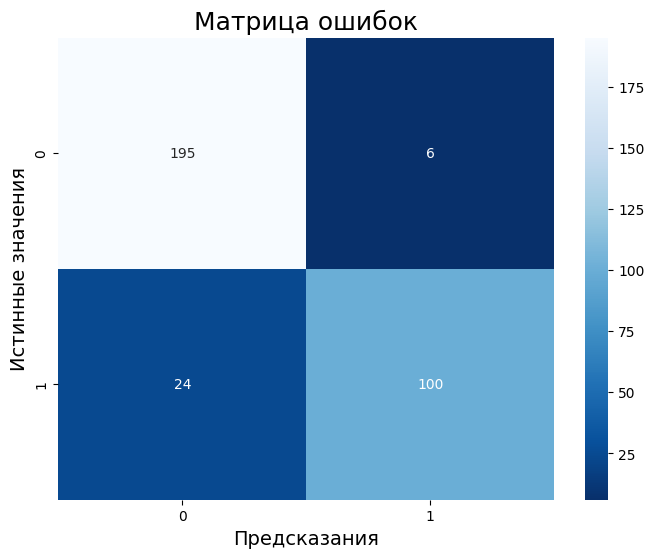

In [71]:
# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=18)
plt.ylabel('Истинные значения', fontsize=14)
plt.xlabel('Предсказания', fontsize=14)       

# Рассчитаем метрики 
print(f'recall: {round(recall_score(y_test, y_pred), 2)}')
print(f'precision: {round(precision_score(y_test, y_pred), 2)}')

Итак, наша модель допускает довольно мало ошибок 1-го рода (6 ошибок), что подтверждает и метрика <code>precision</code> 0.94. Ошибок 2-го рода - 24, когда модель присваивает класс 0 классу 1. Для нас это означает, что модель предсказывает стабильный уровень покупательской активности клиентам, у которых на самом деле активность снизилась. Метрика <code>recall</code> составляет - 0.81, для нас данная метрика более показательна, так как для нас важно не упускать клиентов, у которых покупательская активность снизится. Подберем порог принадлежности классов для увеличения полноты предсказаний и увеличения метрики <code>recall</code>.

In [72]:
# Рассчитаем оценки принадлежности к классу 1
y_proba_cv = cross_val_predict(grid_search.best_estimator_, X_train, y_train, method='predict_proba')

# Добавим пороги принадлежности к классам
thresholds = np.arange(0.2, 0.6, 0.05)

# Посчитаем recall для каждого порога
for i in thresholds:
    y_pred_threshold = (y_proba_cv[:, 1] >= i).astype(int)
    print(f'Recall при шаге {round(i, 3)}: {round(recall_score(y_train, y_pred_threshold), 2)}')

Recall при шаге 0.2: 0.85
Recall при шаге 0.25: 0.83
Recall при шаге 0.3: 0.82
Recall при шаге 0.35: 0.8
Recall при шаге 0.4: 0.79
Recall при шаге 0.45: 0.78
Recall при шаге 0.5: 0.77
Recall при шаге 0.55: 0.75


Итак, при пороге <code>0.3</code> метрика <code>recall</code> составляет уже <code>0.83</code>, если еще сильнее снизить порог, то могут пострадать остальные метрики. Установим данный порог для предсказаний классов моделью и проверим остальные метрики и матрицу ошибок.

recall: 0.85
precision: 0.8


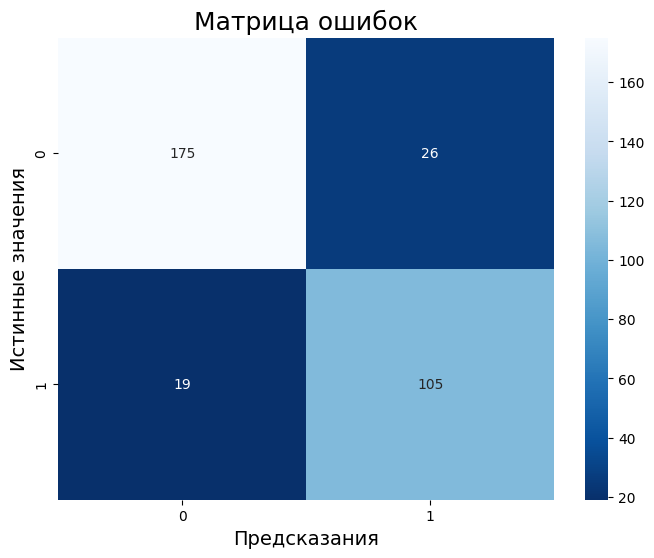

In [73]:
# Установим свой порог
custom_threshold = 0.3

# Получим предсказания на основе нового порога
y_pred_two = (y_proba >= custom_threshold).astype(int)

# Строим матрицу ошибок
cm_two = confusion_matrix(y_test, y_pred_two)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_two, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=18)
plt.ylabel('Истинные значения', fontsize=14)
plt.xlabel('Предсказания', fontsize=14)       

# Рассчитаем метрики 
print(f'recall: {round(recall_score(y_test, y_pred_two), 2)}')
print(f'precision: {round(precision_score(y_test, y_pred_two), 2)}')

Итак, с порогом принадлежности к классам <code>0.3</code> удалось уменьшить кол-во ошибок 2-го рода и увеличить метрику <code>recall</code> до 0.85, так как для нас важно не упускать клиентов, у которых покупательская активность снизится (важна полнота прогнозов) для предсказаний будем использовать порог принадлежности к классам <code>0.3</code>.

<a id='seven_id'></a>
## Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.

In [74]:
# С помощью пайплайна подготовим тренировочную и тестовую выборки
X_train_new = pd.DataFrame(
    grid_search.best_estimator_.named_steps['preprocessor'].transform(X_train), 
    columns=grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
)

X_test_new = pd.DataFrame(
    grid_search.best_estimator_.named_steps['preprocessor'].transform(X_test), 
    columns=grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
)

In [75]:
# Обучим модель с лучшими гиперпараметрами
model = grid_search.best_estimator_.named_steps['models']
model.fit(X_train_new, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Построим диаграмму <code>shap.plots.beeswarm</code> для визуализации вклада признаков в каждое предсказание модели. 

In [76]:
# Рассчитаем SHAP
explainer = shap.Explainer(model.predict, shap.sample(X_test_new, 80))

In [77]:
# Оценим значения SHAP для набора выборок
shap_values = explainer(shap.sample(X_test_new, 80))

PermutationExplainer explainer: 81it [01:27,  1.22s/it]                         


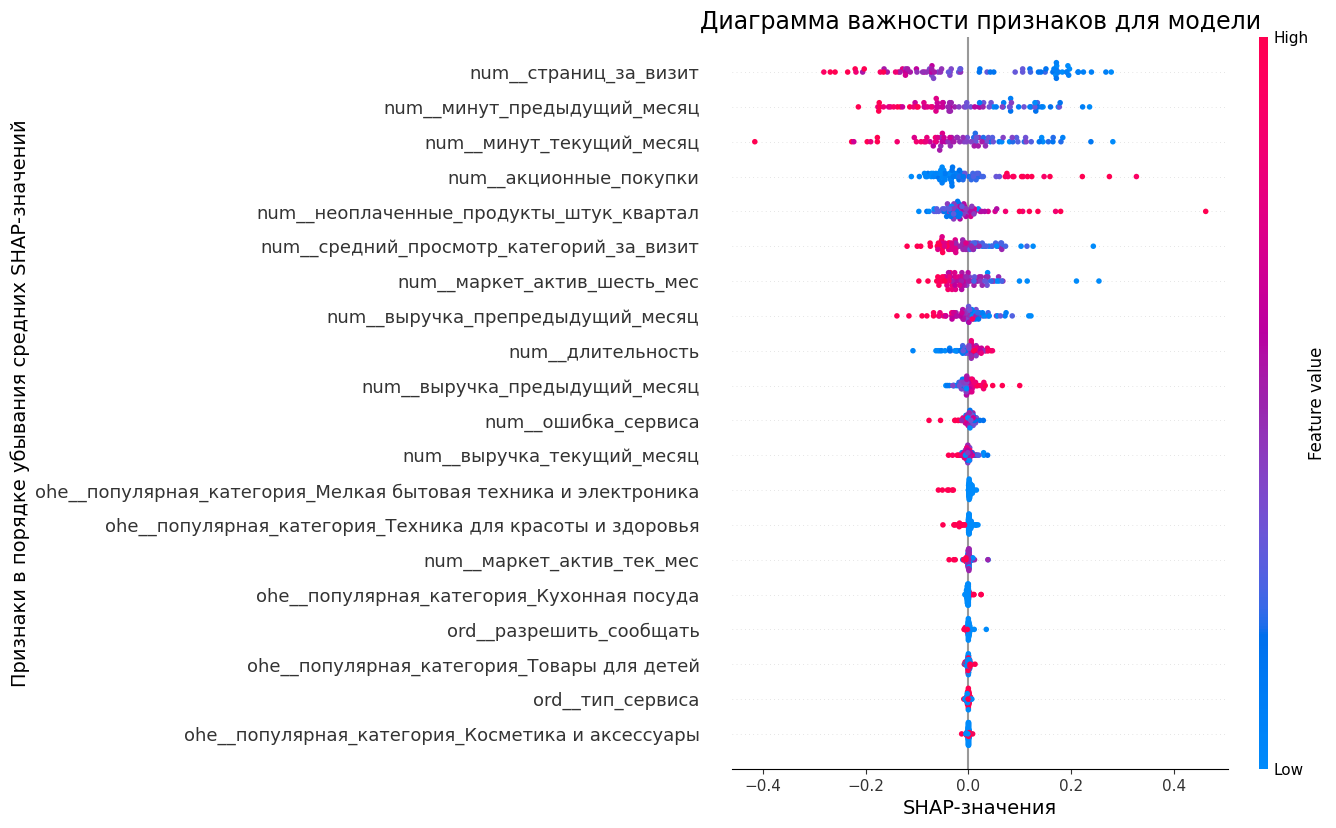

In [78]:
# Построим график shap
shap.plots.beeswarm(shap_values, max_display=22, show=False) 

ax = plt.gca()
ax.set_ylabel("Признаки в порядке убывания средних SHAP‑значений", fontsize=14)
ax.set_xlabel("SHAP-значения", fontsize=14)
ax.set_title('Диаграмма важности признаков для модели', fontsize=17)
plt.show()

На графике точками отображены все наблюдения из выборки. На оси X отложены значения Шепли, на оси Y — признаки модели, расположенные сверху вниз в порядке убывания средних SHAP‑значений. 

Итак, мы можем выделить признаки, которые сильнее всего влияют на целевой признак (в порядке убывания значимости):

- <code>num__страниц_за_визит</code> - высокое значение кол-ва просмотренных страниц за виизит, увеличивает вероятность принадлежности к классу <code>0</code>, т.е. покупательская активность останется на прежнем уровне.
- <code>num__минут_предыдущий_месяц</code> - высокое значение времени, проведённого на сайте в предыдущем месяце увеличивает вероятность сохранения покупательской активности.
- <code>num__минут_текущий_месяц</code> - высокое значение времени, проведённого на сайте в текущем месяце увеличивает веротяность сохранения покупательской активности.
- <code>num__акционные_покупки</code> - в данном признаке обратная ситуация, чем больше пользователь совершит акционных покупок, тем больше вероятность снижения его покупательской активности.
- <code>num__неоплаченные_продукты_штук_квартал</code> - по аналогии с акционными покупками, чем больше у пользователя неоплаченных товаров в корзине, тем больше вероятость снижения его покупательской активности.
- <code>num__средний_просмотр_категорий_за_визит</code> - по аналогоии с предыдущим признаком, высокое среднее значение просмотренных категорий за визит увеличивает веротяность сохранения покупательской активности.
- <code>num__маркет_актив_шесть_мес</code> - высокое значение маркет активности за 6 мес. увеличивает вероятность веротяность сохранения покупательской активности.


Признаки, мало значимые для модели (в порядке убывания значимости):

- <code>num__выручка_препредыдущий_месяц</code>
- <code>num__длительность</code>
- <code>num__выручка_предыдущий_месяц</code>
- <code>num__ошибка_сервиса</code>
- <code>ohe__популярная_категория_Мелкая бытовая техника и электроника</code>
- <code>num__выручка_текущий_месяц</code>
- <code>ohe__популярная_категория_Техника для красоты и здоровья</code>
- <code>num__маркет_актив_тек_мес</code>
- <code>ohe__популярная_категория_Кухонная посуда</code>
- <code>ohe__разрешить_сообщать_нет</code>
- <code>ord__тип_сервиса</code>
- <code>ohe__популярная_категория_Товары для детей</code>
- <code>ohe__популярная_категория_Косметика и аксессуары</code>


Значимые для модели признаки мы можем разбить на две категории:

1. Признаки, высокие значения (или наличие) которых **сохраняют** покупательскую активность:
- <code>num__страниц_за_визит</code>
- <code>num__минут_предыдущий_месяц</code>
- <code>num__минут_текущий_месяц</code>
- <code>num__средний_просмотр_категорий_за_визит</code> 
- <code>num__маркет_актив_шесть_мес</code> 


Если у пользователей снижаются показатели данных признаков, следует увеличить маркетинговую активность с пользователем, организовать рекомендательную подборку товаров, проинформировать о появлении новых товаров на сайте. 

2. Признаки, высокие значения которых **снижают** покупательскую активность:

- <code>num__акционные_покупки</code> 
- <code>num__неоплаченные_продукты_штук_квартал</code>

В случае увеличения неоплаченных товаров в корзине у пользователя следует простимулировать их покупку, скидкой, спец. предложением, осуществить маркетинговую активность (например звонок, для уточнения причины незавершения покупки). А в случае увеличения кол-ва акционных покупок у пользователя следует проинформировать пользователя о дополнительных товарах на которые сейчас действуют акции для стимулирования к свершению дополнительных покупок. 

<a id='eight_id'></a>
## Сегментация покупателей

Добавим столбец <code>вероятность_сниж_покуп_актив</code> - вероятности принадлежности к классу 1 (покупательская активность снизилась) к исходному датасету <code>df_file</code>, а так же столбец <code>предсказания_покуп_актив</code> с предсказаниями модели покупательской активности с порогом <code>0.3</code> 

In [79]:
# Подготовим весь датасет для получения предсказаний вероятностей принадлежностей к классу 1
X = df_file.drop(['покупательская_активность'], axis=1)

X = pd.DataFrame(
    grid_search.best_estimator_.named_steps['preprocessor'].fit_transform(X), 
    columns=grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
)

In [80]:
# Рассчитаем оценки принадлежности к классу 1
x_proba = model.predict_proba(X)[:, 1]

# Добавим столбец с предсказаниями с порогом 0.3
df_file['предсказания_покуп_актив'] = x_proba

df_file['предсказания_покуп_актив'] = df_file['предсказания_покуп_актив'].apply(
    lambda x: 'снизится' if x > 0.3 else 'прежний уровень')

# Добавим столбец с вероятностями принадлежности к классу 1
df_file['вероятность_сниж_покуп_актив'] = x_proba
df_file['вероятность_сниж_покуп_актив'] = round(df_file['вероятность_сниж_покуп_актив'], 2)

df_file.sample(5)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_шесть_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_текущий_месяц,минут_предыдущий_месяц,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,предсказания_покуп_актив,вероятность_сниж_покуп_актив
id,,,,,,,,,,,,,,,,,,,
215599,Снизилась,стандарт,да,3.4,4,716,0.28,Домашний текстиль,2,9,4,6,8,12,6614.4,6058.0,4546.0,снизится,0.98
215899,Снизилась,стандарт,нет,5.0,4,136,0.27,Товары для детей,3,4,4,17,18,11,5329.5,4998.0,5230.0,снизится,0.41
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,13,8,5058.4,5457.5,4826.0,снизится,0.44
215780,Прежний уровень,премиум,да,4.1,3,728,0.28,Косметика и аксессуары,4,1,2,5,21,12,5928.4,5404.5,4950.0,прежний уровень,0.05
215508,Снизилась,стандарт,да,3.5,5,574,0.22,Домашний текстиль,3,2,2,2,5,8,5030.8,4672.0,4102.0,снизится,0.99


In [81]:
# Добавим столбец с выручкой из df_tm_money
df_file = df_file.join(df_tm_money.set_index('id'))

df_file.sample(5)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_шесть_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_текущий_месяц,минут_предыдущий_месяц,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,предсказания_покуп_актив,вероятность_сниж_покуп_актив,прибыль
id,,,,,,,,,,,,,,,,,,,,
215453,Снизилась,премиум,да,2.4,3,506,0.22,Товары для детей,1,5,4,3,12,9,3143.5,3332.0,4290.0,снизится,0.97,3.48
216092,Прежний уровень,стандарт,да,4.3,5,1035,0.25,Мелкая бытовая техника и электроника,5,2,7,5,20,17,5771.2,5194.0,4678.0,прежний уровень,0.06,4.09
215415,Снизилась,стандарт,да,2.4,3,720,0.32,Домашний текстиль,2,6,3,3,9,13,6352.4,6147.0,4875.0,снизится,0.99,3.40
216399,Прежний уровень,стандарт,да,3.8,4,265,0.95,Техника для красоты и здоровья,5,2,1,12,9,15,5285.7,4728.0,5223.0,прежний уровень,0.17,1.57
216137,Прежний уровень,премиум,да,5.4,4,296,0.21,Домашний текстиль,3,5,7,15,12,10,6252.8,5569.0,4930.0,прежний уровень,0.13,2.39


### Выполним сегментацию покупателей. 


Рассмотрим группу клиентов с максимальной долей (более 0.6) покупок по акции и высокой вероятностью (выше 0.8) снижения покупательской активности, которые приносят среднемесячную прибыль от 3 тыс.

In [82]:
df_sale = df_file.query('акционные_покупки > 0.6 and вероятность_сниж_покуп_актив > 0.8 and прибыль > 3')

df_sale

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_шесть_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минут_текущий_месяц,минут_предыдущий_месяц,выручка_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,предсказания_покуп_актив,вероятность_сниж_покуп_актив,прибыль
id,,,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,10,12,4971.6,5216.0,4472.0,снизится,0.98,4.16
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,13,11,6610.4,6158.0,4793.0,снизится,0.88,4.87
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,11,8,5872.5,5807.5,4594.0,снизится,0.98,4.21
215362,Снизилась,премиум,да,4.2,4,438,0.74,Домашний текстиль,3,4,6,4,13,13,4447.9,4314.0,4765.0,снизится,0.85,3.49
215365,Снизилась,стандарт,да,3.9,4,167,0.95,Техника для красоты и здоровья,6,4,2,5,10,6,4799.3,4577.0,4190.0,снизится,0.93,3.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215741,Снизилась,стандарт,да,4.8,4,563,0.94,Товары для детей,1,5,7,4,14,10,4594.4,3960.0,4809.0,снизится,0.94,4.29
215745,Снизилась,стандарт,да,1.7,4,550,0.94,Мелкая бытовая техника и электроника,4,1,3,6,9,9,6126.4,5654.5,4990.0,снизится,0.94,5.10
215747,Снизилась,стандарт,да,3.5,5,452,0.93,Товары для детей,1,5,5,4,10,10,4089.3,3555.0,4168.0,снизится,0.94,3.32


Итак, мы получили 96 пользователей, у которых доля покупок по акции более 0.6, вероятность снижения покупательской активности более 0.8, приносящие среднемесячную прибыль от 3 тыс. У всех пользователей покупательская активность не менее трёх месяцев (т.к. отсутствует нулевое значение во всех периодах). Проведем графическое и аналитическое исследование данной группы покупателей и сделаем предложения по работе с сегментом для увеличения покупательской активности. 

Ранее мы выяснили важные для модели признаки:

**1.** Признаки, высокие значения (или наличие) которых **сохраняют** покупательскую активность:
- <code>num__страниц_за_визит</code>
- <code>num__минут_предыдущий_месяц</code> 
- <code>num__минут_текущий_месяц</code>
- <code>num__средний_просмотр_категорий_за_визит</code> 
- <code>num__маркет_актив_шесть_мес</code> 


**2.** Признаки, высокие значения которых **снижают** покупательскую активность:

- <code>num__акционные_покупки</code> 
- <code>num__неоплаченные_продукты_штук_квартал</code>

Рассмотрим данные признаки более подробно. 

Рассмотрим признак <code>неоплаченные_продукты_штук_квартал</code>

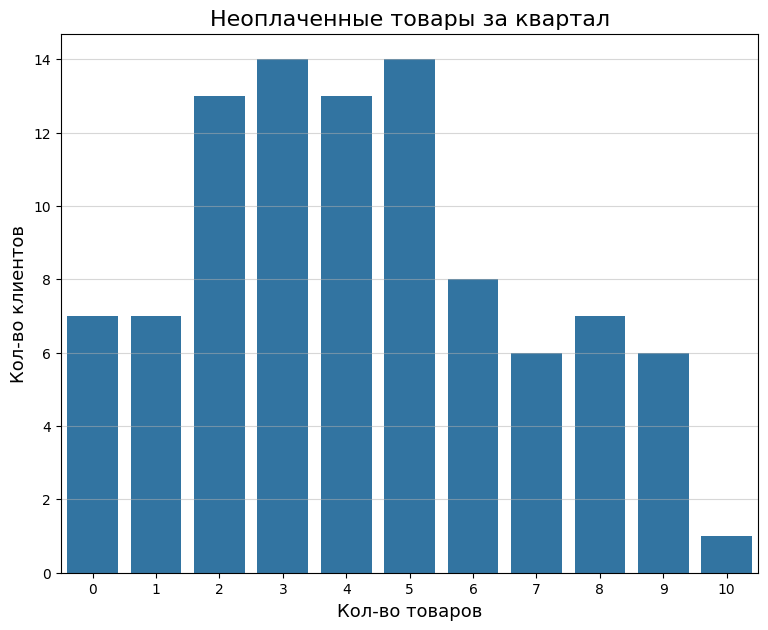

In [83]:
# Построим график для дискретного признака
plt.figure(figsize=(9, 7))
sns.countplot(x='неоплаченные_продукты_штук_квартал', data=df_sale, order=sorted(df_sale['неоплаченные_продукты_штук_квартал'].unique()))

# Зададим параметры графику
plt.legend
plt.title('Неоплаченные товары за квартал', fontsize=16)
plt.xlabel('Кол-во товаров', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

Итак, на графике мы видим, что у наибольшего числа покупателей кол-во неоплаченных товаров равно 4. Как мы ранее выяснили, что с увеличением кол-ва неоплаченных товаров в корзине увеличивается вероятность снижения покупательской активности. Следует провести маркетинговую активность с покупателями, имеющими неоплаченные товары в корзине, как пример - произвести прозвон клиентов и узнать причины, по которым пользователи не завершили покупку. Выявленные причины помогут простимулировать завершение покупки (возможно данный сегмент покупателей ожидают появления скидок на товары в корзине).

Рассмотрим признак <code>страниц_за_визит</code> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

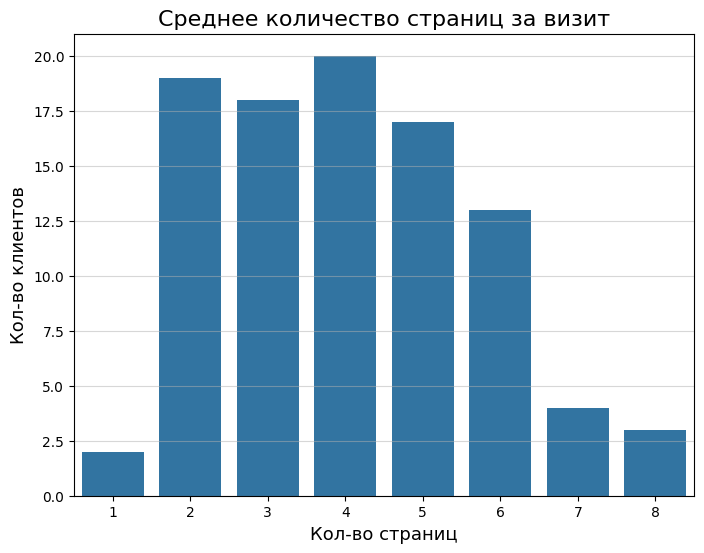

In [84]:
# Построим график для дискретного признака
plt.figure(figsize=(8, 6))
sns.countplot(x='страниц_за_визит', data=df_sale, order=sorted(df_sale['страниц_за_визит'].unique()))

# Зададим параметры графику
plt.legend
plt.title('Среднее количество страниц за визит', fontsize=16)
plt.xlabel('Кол-во страниц', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

Итак, наш сегмент покупателей за последние три месяца в среднем просматривает 4 страницы за визит, что меньше среднего всего датасета в 2 раза. Как ранее мы выяснили, что с увеличением кол-ва страниц за визит, растет вероятность сохранения покупательской активности. Возможно добавление новых товаров или увеличение кол-ва товаров с акциями поможет удержать пользователя на сайте более длительное время. 

Рассмотрим признак <code>средний_просмотр_категорий_за_визит</code> — сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

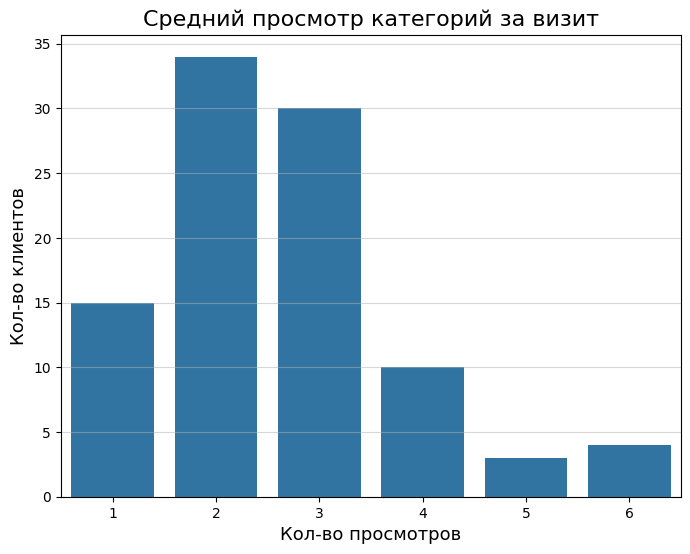

In [85]:
# Построим график для дискретного признака
plt.figure(figsize=(8, 6))
sns.countplot(x='средний_просмотр_категорий_за_визит', data=df_sale, order=sorted(df_sale['средний_просмотр_категорий_за_визит'].unique()))

# Зададим параметры графику
plt.legend
plt.title('Средний просмотр категорий за визит', fontsize=16)
plt.xlabel('Кол-во просмотров', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(True, axis='y', alpha=0.5)
plt.show()

Итак, наш сегмент покупателей в среднем просматривает 2 категории товаров за визит. Как ранее мы выяснили, что с увеличением кол-ва просмотра категорий за визит, растет вероятность сохранения покупательской активности. Рассмотрим категориальный признак <code>популярная_категория</code> - самая популярная категория товаров у покупателя за последние 6 месяцев и выясним какие категории товаров пользуются у нашего сегмента наибольшим спросом.

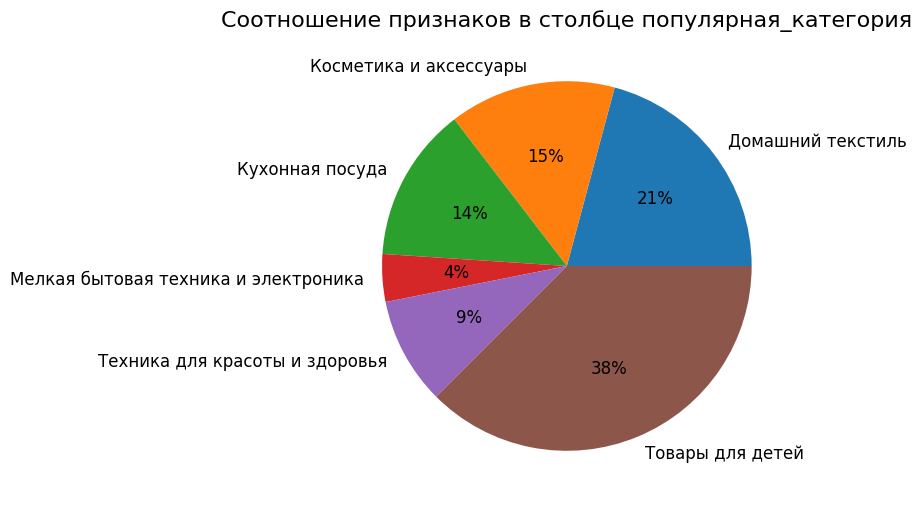

In [86]:
# Построим круговую диаграмму для столбца "популярная_категория"
object_pie(df_sale, 'популярная_категория')

Итак, наибольшим спросом пользуются категории `Товары для детей`, `Косметика и аксессуары` и `Домашний текстиль`. Следует простимулировать пользователей покупать товары наименее популярных категории `Мелкая бытовая техника и электроника` и `Техника для красоты и здоровья` предложив нашему сегменту пользователей скидки и персональные предложения, тем самым мы сможем увеличить кол-во просматриваемых категорий пользователями, что может привести к сохранению покупательской активности. Прочие категории товаров продаются достаточно хорошо для нашего сегмента пользователей. 

Рассмотрим количественный признак <code>минут_предыдущий_месяц</code> — значение времени, проведённого на сайте, в минутах в предыдущем месяце.

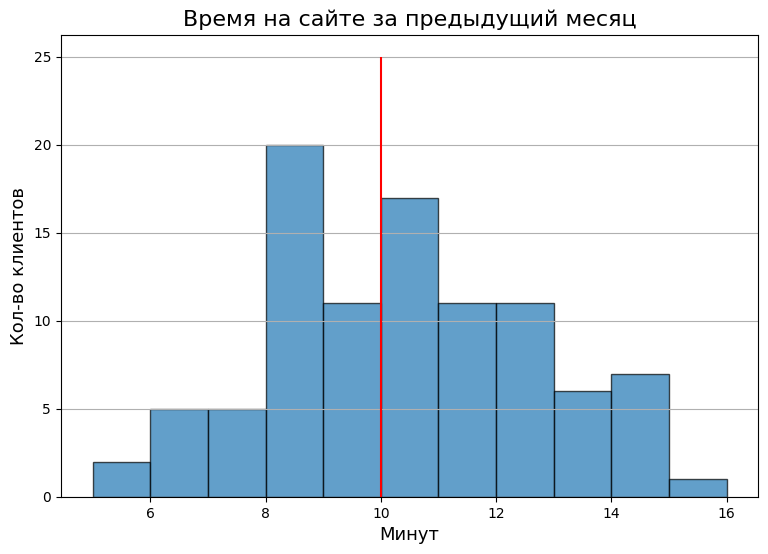

In [87]:
# Построим гистограмму 
df_sale['минут_предыдущий_месяц'].hist(bins=11, figsize=(9,6), alpha=0.7, edgecolor='black')

# Отобразим медиану
plt.vlines(df_sale['минут_предыдущий_месяц'].median(), ymin=0, ymax=25, color='red', label='Медиана')

# Зададим параметры графику
plt.legend
plt.title('Время на сайте за предыдущий месяц', fontsize=16)
plt.xlabel('Минут', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(False, axis='x')
plt.show()

Итак, наш сегмент покупателей в среднем провел 10 минут на сайте за предыдущий месяц, большинство пользователей проводят 8 минут. Как ранее мы выяснили, что с увеличением времени на сайте, растет вероятность сохранения покупательской активности. Ниже рассмотрим время пользователей за текущий месяц и посмотрим на тенденцию.

Рассмотрим количественный признак <code>минут_текущий_месяц</code> — значение времени, проведённого на сайте, в минутах в текущем месяце.

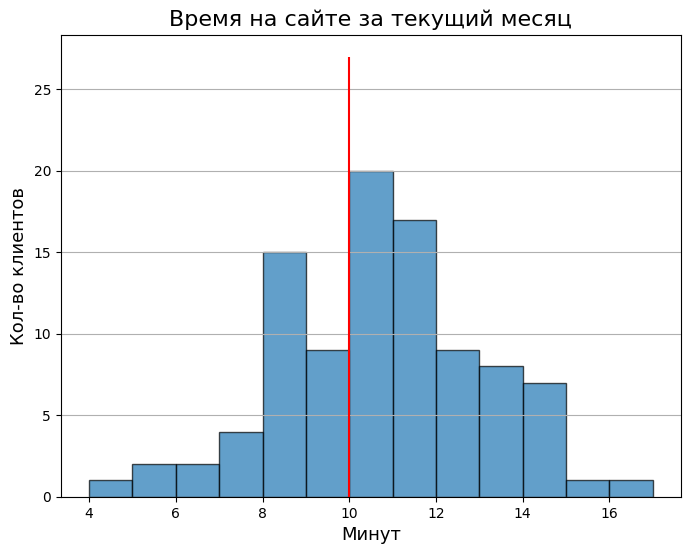

In [88]:
# Построим гистограмму 
df_sale['минут_текущий_месяц'].hist(bins=13, figsize=(8,6), alpha=0.7, edgecolor='black')

# Отобразим медиану
plt.vlines(df_sale['минут_текущий_месяц'].median(), ymin=0, ymax=27, color='red', label='Медиана')

# Зададим параметры графику
plt.legend
plt.title('Время на сайте за текущий месяц', fontsize=16)
plt.xlabel('Минут', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(False, axis='x')
plt.show()

Итак, наш сегмент покупателей в среднем провел 10 минут на сайте за текйщий месяц, это же время на сайте характерно для большинства пользователей. Как ранее мы выяснили, что с увеличением времени на сайте, растет вероятность сохранения покупательской активности. В сравнении с предыдущим месяцем время на сайте для большинства пользователей увеличилось. Возможно добавление новых товаров или увеличение кол-ва товаров с акциями поможет удержать пользователя на сайте более длительное время. 

Рассмотрим количественный признак <code>маркет_актив_шесть_мес</code> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. 

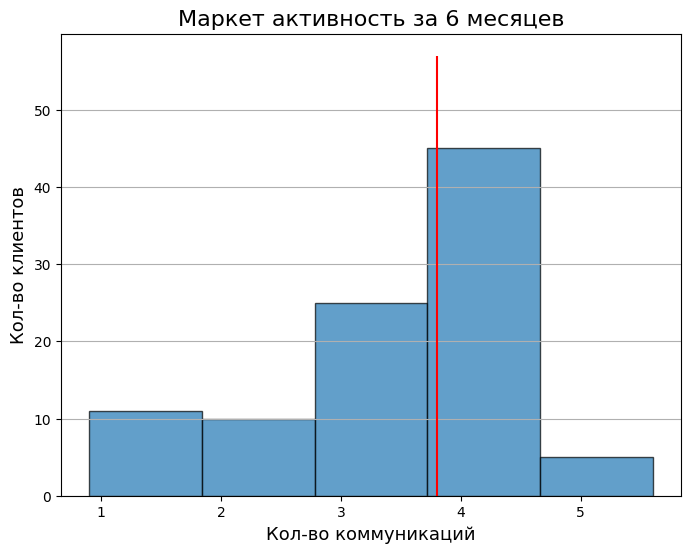

In [89]:
# Построим гистограмму 
df_sale['маркет_актив_шесть_мес'].hist(bins=5, figsize=(8,6), alpha=0.7, edgecolor='black')

# Отобразим медиану
plt.vlines(df_sale['маркет_актив_шесть_мес'].median(), ymin=0, ymax=57, color='red', label='Медиана')

# Зададим параметры графику
plt.legend
plt.title('Маркет активность за 6 месяцев', fontsize=16)
plt.xlabel('Кол-во коммуникаций', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(False, axis='x')
plt.show()

Итак, для нашего сегмента покупателей среднемесячное значение маркетинговых коммуникаций компании составляет порядка 4, это значение характерно и для большинства пользователей. Как ранее мы выяснили, что с увеличением маркетинговых коммуникаций, растет вероятность сохранения покупательской активности. Следует провести маркетинговые коммуникаций для пользователей, у которых среднемесячный показатель менее 4-х. 

Рассмотрим количественный признак <code>прибыль</code> — среднемесячная прибыль продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

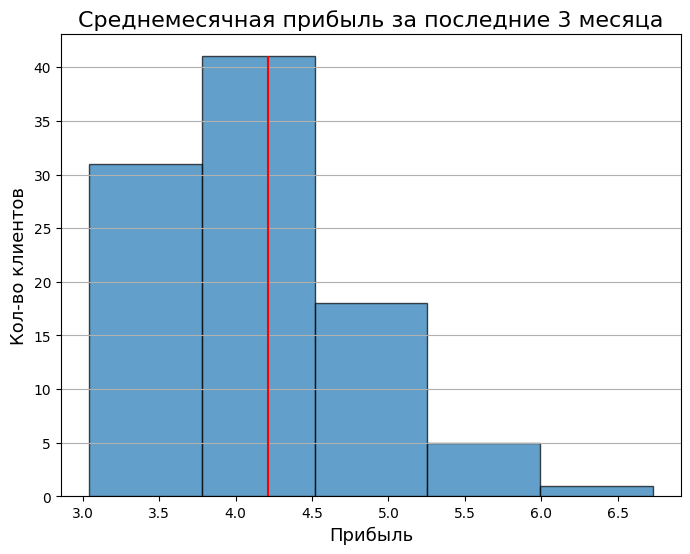

In [90]:
# Построим гистограмму 
df_sale['прибыль'].hist(bins=5, figsize=(8,6), alpha=0.7, edgecolor='black')

# Отобразим медиану
plt.vlines(df_sale['прибыль'].median(), ymin=0, ymax=41, color='red', label='Медиана')

# Зададим параметры графику
plt.legend
plt.title('Среднемесячная прибыль за последние 3 месяца', fontsize=16)
plt.xlabel('Прибыль', fontsize=13)
plt.ylabel('Кол-во клиентов', fontsize=13)
plt.grid(False, axis='x')
plt.show()

Итак, по нашему сегменту магазин получает в среднем 4.2 тыс, эта сумма характерна для наибольшего числа покупателей. Кол-во пользователей, приносящие магазину прибыль более 4.5 тыс крайне мало. Увеличить прибыль поможет наличие акций и скидок на более дорогостоящие позиции, что поможет увеличить средний чек покупок. 

### Промежуточный вывод:

Для группы клиентов, с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности, для увеличения покупательской активности следует провести следующую работу:

- Следует провести маркетинговые коммуникаций (направить рассылки, совершить звонок, показать рекламу, направить спец предложение на почту) для пользователей, у которых среднемесячный показатель менее 4-х.
- Следует произвести прозвон клиентов с неоплаченными товарами в корзине и узнать причины, по которым пользователи не завершили покупку. Выявленные причины помогут простимулировать завершение покупки (возможно данный сегмент покупателей ожидают появления скидок на товары в корзине или могут быть совершенно иные причины).
- Следует простимулировать пользователей покупать товары категории `Мелкая бытовая техника и электроника` и `Техника для красоты и здоровья` предложив нашему сегменту пользователей скидки и персональные предложения, тем самым мы сможем увеличить кол-во просматриваемых категорий пользователями, что приводит к сохранению покупательской активности. Прочие категории товаров продаются достаточно хорошо для нашего сегмента пользователей. 
- Следует добавить новые товары или увеличить кол-во товаров с акциями, что поможет удержать пользователя на сайте более длительное время. 
- Следует добавить акции и скидоки на более дорогостоящие позиции, это поможет увеличить средний чек покупок и прибыль.

<a id='nine_id'></a>
## Общий вывод

**Описание задачи:**

- Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
- Включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
- Выделить сегменты покупателей и разработать для них персонализированные предложения, используя данные модели и данные о прибыльности клиентов.

**Исходные данные:**

**1.** Датасет <code>df_file</code> содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:

- <code>id</code> — номер покупателя в корпоративной базе данных.
- <code>Покупательская активность</code> — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- <code>Тип сервиса</code> — уровень сервиса, например «премиум» и «стандарт».
- <code>Разрешить сообщать</code> — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- <code>Маркет_актив_6_мес</code> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- <code>Маркет_актив_тек_мес</code> — количество маркетинговых коммуникаций в текущем месяце.
- <code>Длительность</code> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- <code>Акционные_покупки</code> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- <code>Популярная_категория</code> — самая популярная категория товаров у покупателя за последние 6 месяцев.
- <code>Средний_просмотр_категорий_за_визит</code> — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- <code>Неоплаченные_продукты_штук_квартал</code> — общее число неоплаченных товаров в корзине за последние 3 месяца.
- <code>Ошибка_сервиса</code> — число сбоев, которые коснулись покупателя во время посещения сайта.
- <code>Страниц_за_визит</code> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**2.** Датасет <code>df_money</code> содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом:

- <code>id</code> — номер покупателя в корпоративной базе данных.
- <code>Период</code> — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- <code>Выручка</code> — сумма выручки за период.

**3.** Датасет <code>df_time</code> содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода:

- <code>id</code> — номер покупателя в корпоративной базе данных.
- <code>Период</code> — название периода, во время которого зафиксировано общее время.
- <code>минут</code> — значение времени, проведённого на сайте, в минутах.


**4.** Датасет <code>df_tm_money</code> содержит данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю:

- <code>id</code> — номер покупателя в корпоративной базе данных.
- <code>Прибыль</code> — значение прибыли.

**Проведённая предобработка:**

- Привели наименования столбцов к нижнему змеиному регистру.
- Преобразовали категориальные столбцы в тип тип <code>category</code> для упрощения и ускорения дальнейшей работы. Данные такого типа занимают меньше памяти. 
- В датасете <code>df_file</code> исправили категориальное значение с ошибкой, в столбе <code>тип_сервиса</code> заменили значение 'стандартт' на 'стандарт', а в столбце <code>популярная_категория</code> заменили значение 'Косметика и аксесуары' на 'Косметика и аксессуары'. В датасете <code>df_time</code> в столбце <code>период</code> исправили категориальное значение с ошибкой, заменили 'предыдцщий_месяц' на 'предыдущий_месяц'.
- Отбрали клиентов с покупательской активностью не менее трёх месяцев.
- Добавили в датасет <code>df_file</code> новые столбцы с выручкой за текущий, предыдущий и препредыдущий месяцы, а так же столбцы со временем на сайте за текущий и предыдущий месяцы.

**Для поиска лучшей модели мы провели следующие работу:**

- Провели корреляционный анализ помощью матрицы корреляции Фи, благодаря чему выявили мультиколлинеарность между целевым признаком и входным признаком id (коэф. 0.98). Из-за этого могла произойти утечка целевого признака, и как следствие модели не смогут в должной степени уловить прочие закономерности и связи с остальными входными признаками. Столбец <code>id</code> сделали индексным.
- С помощью пайпланов и инструмента по подбору гиперпараметров <code>GridSearchCV</code> мы смогли перебрать комбинации масштабирования данных методами <code>StandardScaler</code> и <code>MinMaxScaler</code> для 4-х моделей с гиперпараметрами:
    - <code>KNeighborsClassifier</code> с кол-вом k-ближайших соседей от 2 до 4; 
    - <code>DecisionTreeClassifier</code> с глубиной дерева от 2 до 8;
    - <code>LogisticRegression</code> с силой регуляризации от 1 до 4;
    - <code>SVC</code>.

- При подборе гиперпараметров мы использовали метрику <code>ROC-AUC</code> - данная метрика хорошо себя проявляет, когда объектов с одним значением целевого признака больше, чем с другими, а как мы ранее выяснили, у нас наблюдается дисбаланс целевого признака (у 62% клиентов покупательская активность осталась на прежнем уровне, тогда как у 38% клиентов покупательская активность снизилась).


- По итогам работы <code>GridSearchCV</code> мы получили **лучшую модель <code>SVC</code>** с методом масштабирования <code>StandardScaler</code> и метрикой <code>ROC-AUC 0.90</code>. На тестовых данных у модели <code>SVC</code> метрика <code>ROC-AUC 0.92</code>. Довольно высокая метрика <code>ROC-AUC</code> на тренировочной выборке и разница между метрикой на тренировочных и тестовых данных в 0.03 говорит нам о небольшом разбросе, значит модель достаточно хорошо обучилась на тренировочных данных и при этом не произошло переобучения модели.

- Для лучшей модели нашли порог принадлежности к классам <code>0.3</code>. С данным порогом нам удалось уменьшить кол-во ошибок 2-го рода и увеличить метрику <code>recall</code> до 0.85, так как для нас важно не упускать клиентов, у которых покупательская активность снизится (важна полнота прогнозов). 

- Добавили столбец <code>предсказания_покуп_актив</code> с предсказаниями модели покупательской активности с порогом <code>0.3</code> к исходному датасету <code>df_file</code>.

- Выявили значимые для модели признаки, которые можно разбить на две категории:

  **1.** Признаки, высокие значения (или наличие) которых **сохраняют** покупательскую активность:
   - <code>num__страниц_за_визит</code> 
   - <code>num__средний_просмотр_категорий_за_визит</code> 
   - <code>num__минут_предыдущий_месяц</code> 
   - <code>num__минут_текущий_месяц</code>
   - <code>num__маркет_актив_шесть_мес</code> 
   - <code>ohe__популярная_категория_Мелкая бытовая техника и электроника</code> 

  **2.** Признаки, высокие значения которых **снижают** покупательскую активность:

   - <code>num__акционные_покупки</code> 
   - <code>num__неоплаченные_продукты_штук_квартал</code>

**Сегментация покупателей:**

Отобрали группу клиентов с максимальной долей покупок по акции (более 0.6) и высокой вероятностью снижения покупательской активности (выше 0.8). Провели графическое и аналитическое исследование данной группы покупателей и разработали следующие предложения по работе с сегментом для увеличения покупательской активности:

- Следует провести маркетинговые коммуникаций (направить рассылки, совершить звонок, показать рекламу, направить спец предложение на почту) для пользователей, у которых среднемесячный показатель менее 4-х.
- Следует произвести прозвон клиентов с неоплаченными товарами в корзине и узнать причины, по которым пользователи не завершили покупку. Выявленные причины помогут простимулировать завершение покупки (возможно данный сегмент покупателей ожидают появления скидок на товары в корзине или могут быть совершенно иные причины).
- Следует простимулировать пользователей покупать товары категории `Мелкая бытовая техника и электроника` и `Техника для красоты и здоровья` предложив нашему сегменту пользователей скидки и персональные предложения, тем самым мы сможем увеличить кол-во просматриваемых категорий пользователями, что приводит к сохранению покупательской активности. Прочие категории товаров продаются достаточно хорошо для нашего сегмента пользователей. 
- Следует добавить новые товары или увеличить кол-во товаров с акциями, что поможет удержать пользователя на сайте более длительное время. 
- Следует добавить акции и скидоки на более дорогостоящие позиции, это поможет увеличить средний чек покупок и прибыль.